# Analysis of the Global Innovation Index (GII) by WIPO

Summary: https://www.wipo.int/web-publications/global-innovation-index-2024/en/index.html  
Dataset: https://www.wipo.int/publications/de/details.jsp?id=4756&plang=DE


## Download & Preprocess Data

In [1]:
import wget
import os.path
import pandas as pd

filename = "../data/GII_2024.xlsx"
if not os.path.isfile(filename):
    url = "https://www.wipo.int/edocs/pubdocs/en/wipo-pub-2000-2024-tech1.xlsx"
    filename = wget.download(url, out=filename)

GII_2024 = pd.read_excel(filename, sheet_name=None)



In [2]:
def download(filename, url):
    if not os.path.isfile(filename):
        filename = wget.download(url, out=filename)

filename_2023 = "../data/GII_2023.xlsx"
filename_2022 = "../data/GII_2022.xlsx"
filename_2021 = "../data/GII_2021.xlsx"

download(filename_2023, "https://www.wipo.int/edocs/pubdocs/en/wipo-pub-2000-2023-tech1.xlsx")
download(filename_2022, "https://www.wipo.int/edocs/pubdocs/en/wipo-pub-2000-2022-tech1.xlsx")
download(filename_2021, "https://www.wipo.int/edocs/pubdocs/en/wipo_pub_2000-tech1.xlsx")

GII_2023 = pd.read_excel(filename_2023, sheet_name=None)
GII_2022 = pd.read_excel(filename_2022, sheet_name=None)
GII_2021 = pd.read_excel(filename_2021, sheet_name=None)

//TODO: rename get_europe function, what does it actually do?

In [3]:
def get_europe(in_df, data_name = "Data", economies_name = "Economies", iso_name = "ISO3", economy_name_name = "ECONOMY_NAME", 
               reguncode_name = "REG_UN_CODE", regun_name = "REG_UN"):
   
    gii_data = in_df[data_name]
    #display(gii_data)
    gii_economies = in_df[economies_name]
    #display(gii_economies)

    joined = gii_data.merge(gii_economies, on=iso_name, suffixes=["", "_joined_r"]).drop(columns=economy_name_name + "_joined_r")
    #display(joined)

    gii_data_eu = joined[joined[reguncode_name] == "EUR"].drop(columns=[regun_name, reguncode_name])
    #display(gii_data_eu)
    return gii_data_eu

    
    
    

In [4]:
dfs = GII_2024

In [5]:
#gii_data_eu = get_europe(dfs_2021, "GII 2021 Data", "Economies in Context", "ISO2", "Economy", reguncode_name="RegionUNcode", regun_name="RegionUN")

In [6]:
for year in [2022, 2023, 2024]:
    dfs = globals()["GII_" + str(year)]
    gii_data_eu = get_europe(dfs)
    globals()["gii_data_eu_" + str(year)] = gii_data_eu

In [7]:
gii_data_eu = (get_europe(dfs))




EU countries sorted by innovation level

In [8]:
def get_display_data():
    pure_rank = gii_data_eu[gii_data_eu["NUM"].isnull()]
    display_data = pure_rank.sort_values("RANK")[["RANK", "ECONOMY_NAME", "SCORE"]]
    display_data.rename(columns={"RANK": "GLOBAL_RANK"}, inplace=True)
    display_data.index = range(1, len(display_data) + 1)
    return display_data

display_data = get_display_data()

display(display_data)

,GLOBAL_RANK,ECONOMY_NAME,SCORE
1,1.0,Switzerland,67.473082
2,2.0,Sweden,64.524365
3,5.0,United Kingdom,61.049318
4,7.0,Finland,59.436931
5,8.0,Netherlands (Kingdom of the),58.833036
6,9.0,Germany,58.082837
7,10.0,Denmark,57.114019
8,12.0,France,55.413323
9,16.0,Estonia,52.307935
10,17.0,Austria,50.276568


Get all the scores in a nice format

In [9]:
def get_nice_table(gii_data_eu):
    gii_data_eu["NUM"] = gii_data_eu["NUM"].fillna("Final")
    df_scores = gii_data_eu.pivot_table(index='ECONOMY_NAME', columns='NUM', values='SCORE')
    df_scores.head()
    return gii_data_eu, df_scores

gii_data_eu, df_scores = get_nice_table(gii_data_eu)
#df_scores.head()

Check for NaNs

In [10]:
print(len(df_scores))
nans = df_scores.isna().sum()
nans[nans > 5]

39


NUM
IN.1.3.2      8
IN.2.1.2      6
IN.4.1.1      8
IN.4.1.3     28
IN.4.2.1     13
IN.4.2.2      6
OUT.6.1.3    15
OUT.7.1.1     7
OUT.7.2.3    18
dtype: int64

Keep only raw values

//TODO: Warum gibt es in der folgenden Funktion keine Übergabeparameter?

In [11]:
def get_raw_data_index_structure():
    gii_index_structure = dfs["Index Structure"]
    gii_index_structure = gii_index_structure.set_index("NUM")

    indicators = gii_index_structure[gii_index_structure["LEVEL"] == "Indicator"].index.tolist()

    df_scores_raw = df_scores[indicators]
    df_scores_raw.head()
    return df_scores_raw, gii_index_structure

df_scores_raw, gii_index_structure = get_raw_data_index_structure()

## Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

### Correlation

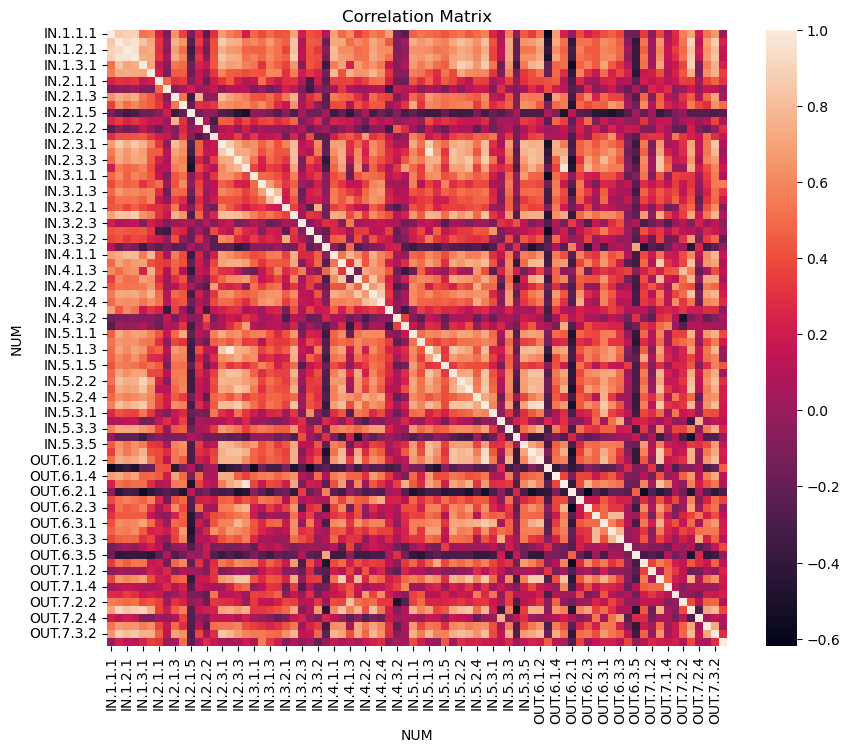

In [13]:
def get_corr_matrix(df_scores_raw):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df_scores_raw.corr(),)
    plt.title("Correlation Matrix")
    plt.show()

get_corr_matrix(df_scores_raw)

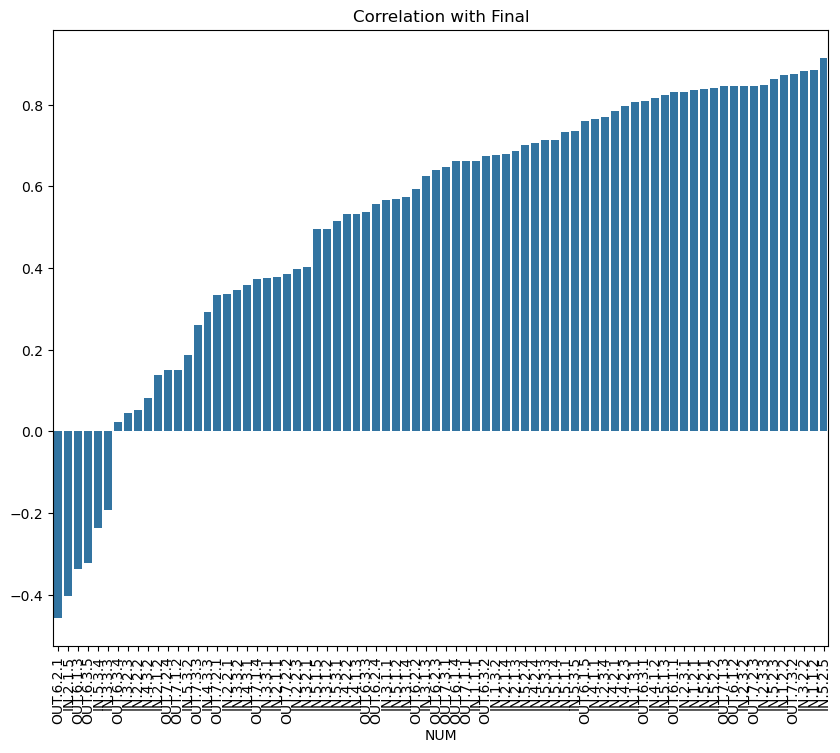

,NAME,DESCRIPTION,corr_w_final
NUM,,,
IN.1.1.2,Government effectiveness*,Index that reflects perceptions of the quality...,0.884958
IN.3.2.2,Logistics performance*,A multidimensional assessment of logistics per...,0.881405
OUT.7.3.2,GitHub commits/mn pop. 15–69,GitHub is the world’s largest host of source c...,0.874284
IN.1.2.2,Rule of law*,Index that reflects perceptions of the extent ...,0.873435
IN.5.2.3,State of cluster development†,Average answer to the survey question: In your...,0.862144
IN.2.3.3,"Global corporate R&D investors, top 3, mn USD",Average expenditure on R&D of the top three gl...,0.846993
OUT.7.2.3,Entertainment and media market/th pop. 15–69,'The Global Telecom and Entertainment & Media ...,0.846177
IN.2.3.2,"Gross expenditure on R&D, % GDP",Gross expenditure on R&D (GERD) is the total d...,0.845228
OUT.6.1.2,PCT patents by origin/bn PPP$ GDP,A PCT application refers to an international p...,0.844857


In [14]:
def get_correlation_final(df_scores_raw, df_scores):
    corr_with_final = df_scores_raw.corrwith(df_scores["Final"])

    plt.figure(figsize=(10, 8))
    g = sns.barplot(corr_with_final.sort_values(),)
    g.tick_params(axis='x', rotation=90)
    plt.title("Correlation with Final")
    plt.show()
    corr_top10 = abs(corr_with_final).sort_values(ascending=False).iloc[1:11]

    corr_top10_info = gii_index_structure.loc[corr_top10.index.to_list()][["NAME", "DESCRIPTION"]]
    corr_top10_info["corr_w_final"] = corr_top10
    display(corr_top10_info)

get_correlation_final(df_scores_raw, df_scores)

NUM,Final,IN.1.1.1,IN.1.1.2,IN.1.2.1,IN.1.2.2,IN.1.2.3,IN.1.3.1,IN.1.3.2,IN.2.1.1,IN.2.1.2,...,OUT.7.1.3,OUT.7.1.4,OUT.7.2.1,OUT.7.2.2,OUT.7.2.3,OUT.7.2.4,OUT.7.3.1,OUT.7.3.2,OUT.7.3.3,OUT.7.3.4
ECONOMY_NAME,,,,,,,,,,,,,,,,,,,,,
Albania,25.426758,52.777778,36.651440,47.102852,32.218405,74.603170,53.954953,NaN,21.385565,9.648313,...,0.000000,22.694029,27.476446,18.342725,NaN,0.447837,7.741508,3.771317,6.029725,55.618992
Austria,53.247123,72.222222,80.083817,77.101802,92.095958,100.000000,82.381093,51.480605,45.189719,43.837719,...,27.255222,54.866511,22.636486,49.409297,63.164926,14.123925,42.107159,68.236516,50.738715,71.040723
Belarus,26.843908,35.416667,15.466163,18.245015,7.494473,72.937295,NaN,4.519599,38.666950,NaN,...,0.000000,24.121034,8.100193,NaN,NaN,10.207383,1.973795,6.564798,24.203359,88.386522
Belgium,49.943794,69.444444,67.802012,76.940038,78.560653,76.897685,66.105904,51.643961,59.419361,39.246380,...,17.451351,33.098651,25.620989,21.352796,50.507709,10.344550,24.665911,63.684251,57.907580,61.864579
Bosnia and Herzegovina,27.148722,41.666667,8.000920,37.464880,31.550794,97.579759,11.226345,26.082013,NaN,61.455524,...,0.000000,18.293905,8.214390,23.867938,NaN,4.289960,3.383727,3.346740,7.018992,47.214588
Bulgaria,38.983933,53.472222,32.902192,53.735132,38.433751,98.774164,38.509407,27.496616,32.189920,39.053988,...,0.000000,49.535792,35.391919,26.436956,NaN,12.153309,28.393305,4.573171,27.948082,71.246694
Croatia,37.070583,69.444444,53.059774,55.128433,48.582797,85.918593,26.505267,1.017713,28.553388,NaN,...,0.761890,43.100161,35.403925,13.195547,NaN,10.132478,17.712134,12.824891,26.252244,70.768487
Czech Republic,44.833748,72.222222,67.392403,77.096638,72.703832,75.797572,45.888937,NaN,36.589477,47.501826,...,5.834382,38.595196,13.112512,40.194607,27.240408,100.000000,20.576460,59.116199,58.016614,74.755815
Denmark,58.733405,85.416667,92.066035,89.042571,96.443001,78.657863,77.205744,NaN,66.749240,37.205424,...,51.651933,54.493039,18.458265,36.488374,77.840740,18.759812,56.787779,100.000000,64.700137,76.415224


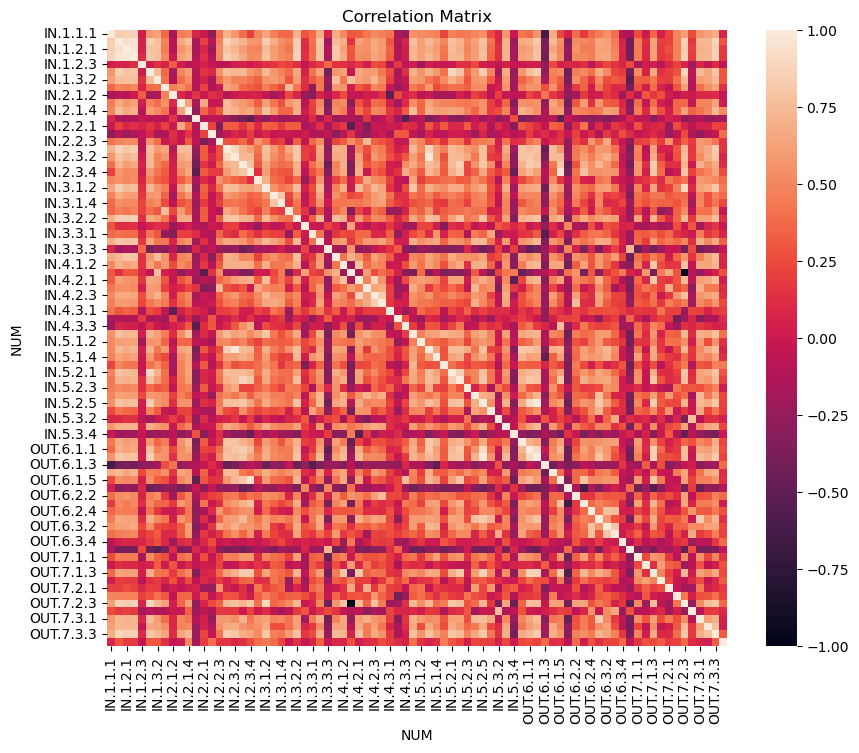

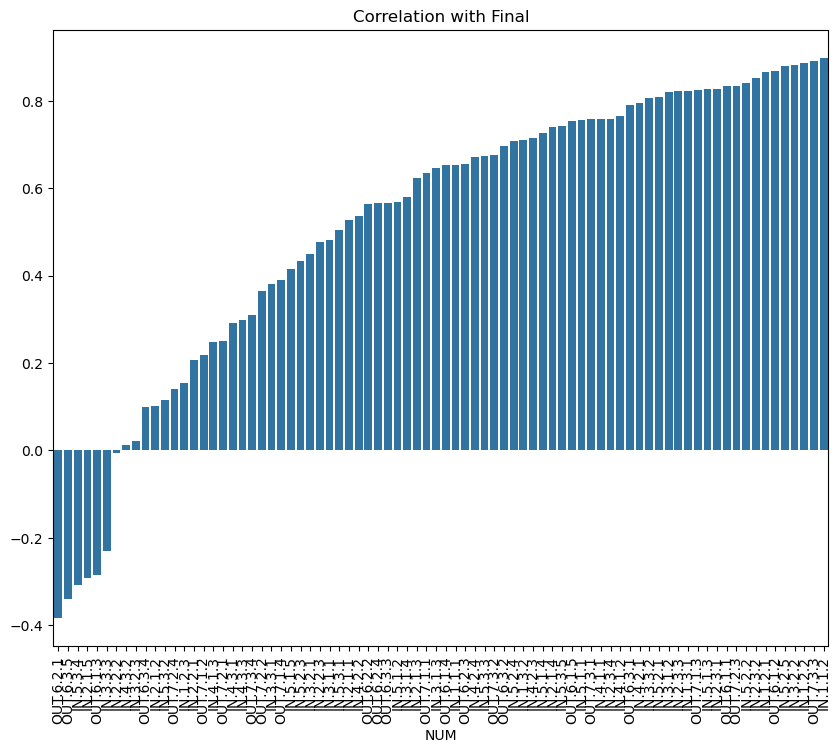

,NAME,DESCRIPTION,corr_w_final
NUM,,,
OUT.7.3.3,GitHub commits/mn pop. 15-69,GitHub is the worldâ€™s largest host of source...,0.890984
IN.1.2.2,Rule of law,Index that reflects perceptions of the extent ...,0.885219
IN.3.2.2,Logistics performance,A multidimensional assessment of logistics per...,0.881330
IN.5.2.5,Patent families/bn PPP$ GDP,A patent family is a set of interrelated paten...,0.879816
OUT.6.1.2,PCT patents by origin/bn PPP$ GDP,A PCT application refers to an international p...,0.868528
IN.1.2.1,Regulatory quality,Index that reflects perceptions of the ability...,0.866366
IN.2.3.2,"Gross expenditure on R&D, % GDP",Gross expenditure on R&D (GERD) is the total d...,0.852385
IN.5.2.2,State of cluster development,Average answer to the survey question: In your...,0.840780
OUT.7.2.3,Entertainment and media market/th pop. 15-69,The Global Entertainment & Media Outlook is a ...,0.832753


In [15]:
dfs = GII_2023
gii_data_eu = get_europe(dfs)



gii_data_eu, df_scores = get_nice_table(gii_data_eu)
df_scores_raw, gii_index_structure = get_raw_data_index_structure()
gii_index_structure = GII_2023["Index Structure"]
gii_index_structure = gii_index_structure.set_index("NUM")

indicators = ['Final']
indicators.extend(gii_index_structure[gii_index_structure["LEVEL"] == "Indicator"].index.tolist())

GII_2023_prepared = df_scores[indicators]
display(GII_2023_prepared)
get_corr_matrix(df_scores_raw)
get_correlation_final(df_scores_raw, df_scores)

## Predictors

### Finding predictors for future innovation level

In [16]:
import sklearn
import numpy as np

In [17]:
from sklearn.svm import LinearSVR
from  sklearn.ensemble import GradientBoostingRegressor
from sklearn.impute import SimpleImputer


from sklearn.feature_selection import SelectFromModel
y = df_scores["Final"]
#X = df_scores_raw.drop(columns="Final")
X = df_scores_raw
#X.interpolate(method='linear', limit_direction='forward', axis=0, inplace=True)
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)
if np.isnan(X_imputed).any():
    raise ValueError("There are still NaN values in X_imputed after imputation")

In [18]:
pd.DataFrame(X_imputed).isna().any().sum()

0

In [19]:

reg = GradientBoostingRegressor(random_state=0)
reg.fit(X_imputed,y)
importances = reg.feature_importances_



In [20]:
importances_df = pd.DataFrame(importances, index=X.columns, columns=["Importance"])

In [21]:
importances_df.head()

,Importance
NUM,
IN.1.1.1,0.000269
IN.1.1.2,0.008640
IN.1.2.1,0.025364
IN.1.2.2,0.069525
IN.1.2.3,0.000000


<Axes: xlabel='NUM'>

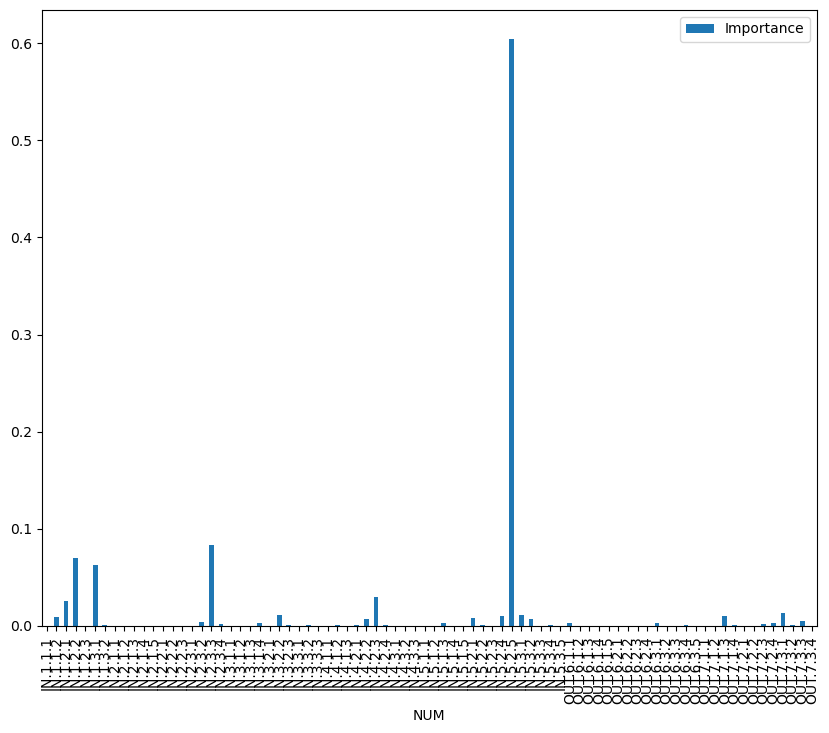

In [22]:
importances_df.plot(kind='bar', figsize=(10, 8))

In [23]:

lsvc = LinearSVR(C=0.01).fit(X_imputed, y)

model = SelectFromModel(lsvc, prefit=True)

model.get_support(True)

/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


array([ 2,  3,  4, 13, 14, 15, 17, 21, 22, 24, 28, 29, 31, 34, 40, 43, 48,
       49, 54, 55, 57, 58, 61, 62, 64, 65, 68, 69, 70, 71, 72, 74, 76, 78])

In [24]:
from sklearn.ensemble import ExtraTreesClassifier

# Eurostat Data

Getting useful data using eurostat package


In [25]:
import eurostat

# Dataset 	GERD by sector of performance and socioeconomic objectives rd_e_gerdsobj92
# sectperf: TOTAL All sectors
# sectperf: BES Business enterprise sector
# sectperf: GVT Government sector
# sectperf: HES Higher education sector
# sectperf: PNP Private non-profit sector

# unit = unit of measure
# EUR_HAB = Euro per inhabitant
# MIO_EUR = Million Euro
# MIO_PPS = Million Purchasing Power Standard
# MIO_PPS_KP05 = Million Purchasing Power Standard per capita, 2005 prices

# geo = country
# EU27_2020 = European Union (27 countries)
# EA20 = Euro area (20 countries)

# Available flags:
# (e) estimated
# (p) provisional
# (d) definition differs (see metadata)
# (bd) break in time series, definition differs (see metadata)
# (b) break in time series
# (de) definition differs (see metadata), estimated
# (dp) definition differs (see metadata), provisional
# (ep) estimated, provisional
# (bp) break in time series, provisional
# (u) low reliability


RD_EXP_BY_SECTOR = eurostat.get_data_df("rd_e_gerdtot", True)
print(RD_EXP_BY_SECTOR.head())
print(RD_EXP_BY_SECTOR["geo\TIME_PERIOD"].unique())

countries = RD_EXP_BY_SECTOR["geo\TIME_PERIOD"].unique()

# Patent applications https://ec.europa.eu/eurostat/databrowser/view/pat_ep_ntot/default/table?lang=en&category=scitech.ipr.pat.pat_h
PAT_APPLICATIONS_HIST = eurostat.get_data_df("pat_ep_ntot", True)
PAT_APPLICATIONS_NEW = eurostat.get_data_df("pat_ep_tot", True)

print(PAT_APPLICATIONS_HIST.head())

  freq sectperf     unit geo\TIME_PERIOD  1980_value 1980_flag  1981_value  \
0    A      BES  EUR_HAB              AT         NaN         :      51.466   
1    A      BES  EUR_HAB              BA         NaN         :         NaN   
2    A      BES  EUR_HAB              BE         NaN         :      92.121   
3    A      BES  EUR_HAB              BG         NaN         :         NaN   
4    A      BES  EUR_HAB              CH         NaN         :     226.259   

  1981_flag  1982_value 1982_flag  ...  2019_value 2019_flag  2020_value  \
0         d         NaN         :  ...     987.624               953.084   
1         :         NaN         :  ...       3.419                 3.630   
2                95.968            ...     972.758              1001.321   
3         :         NaN         :  ...      51.644                53.788   
4                   NaN         :  ...    1629.766                   NaN   

  2020_flag  2021_value 2021_flag  2022_value 2022_flag  2023_value 2023_f

Add a variable to check for timea specific timespan.
Per county of origin.


/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/3019163643.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(missing_values.index, rotation=90)
/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/3019163643.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(missing_values.index, rotation=90)
/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/3019163643.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(missing_values.index, rotation=90)


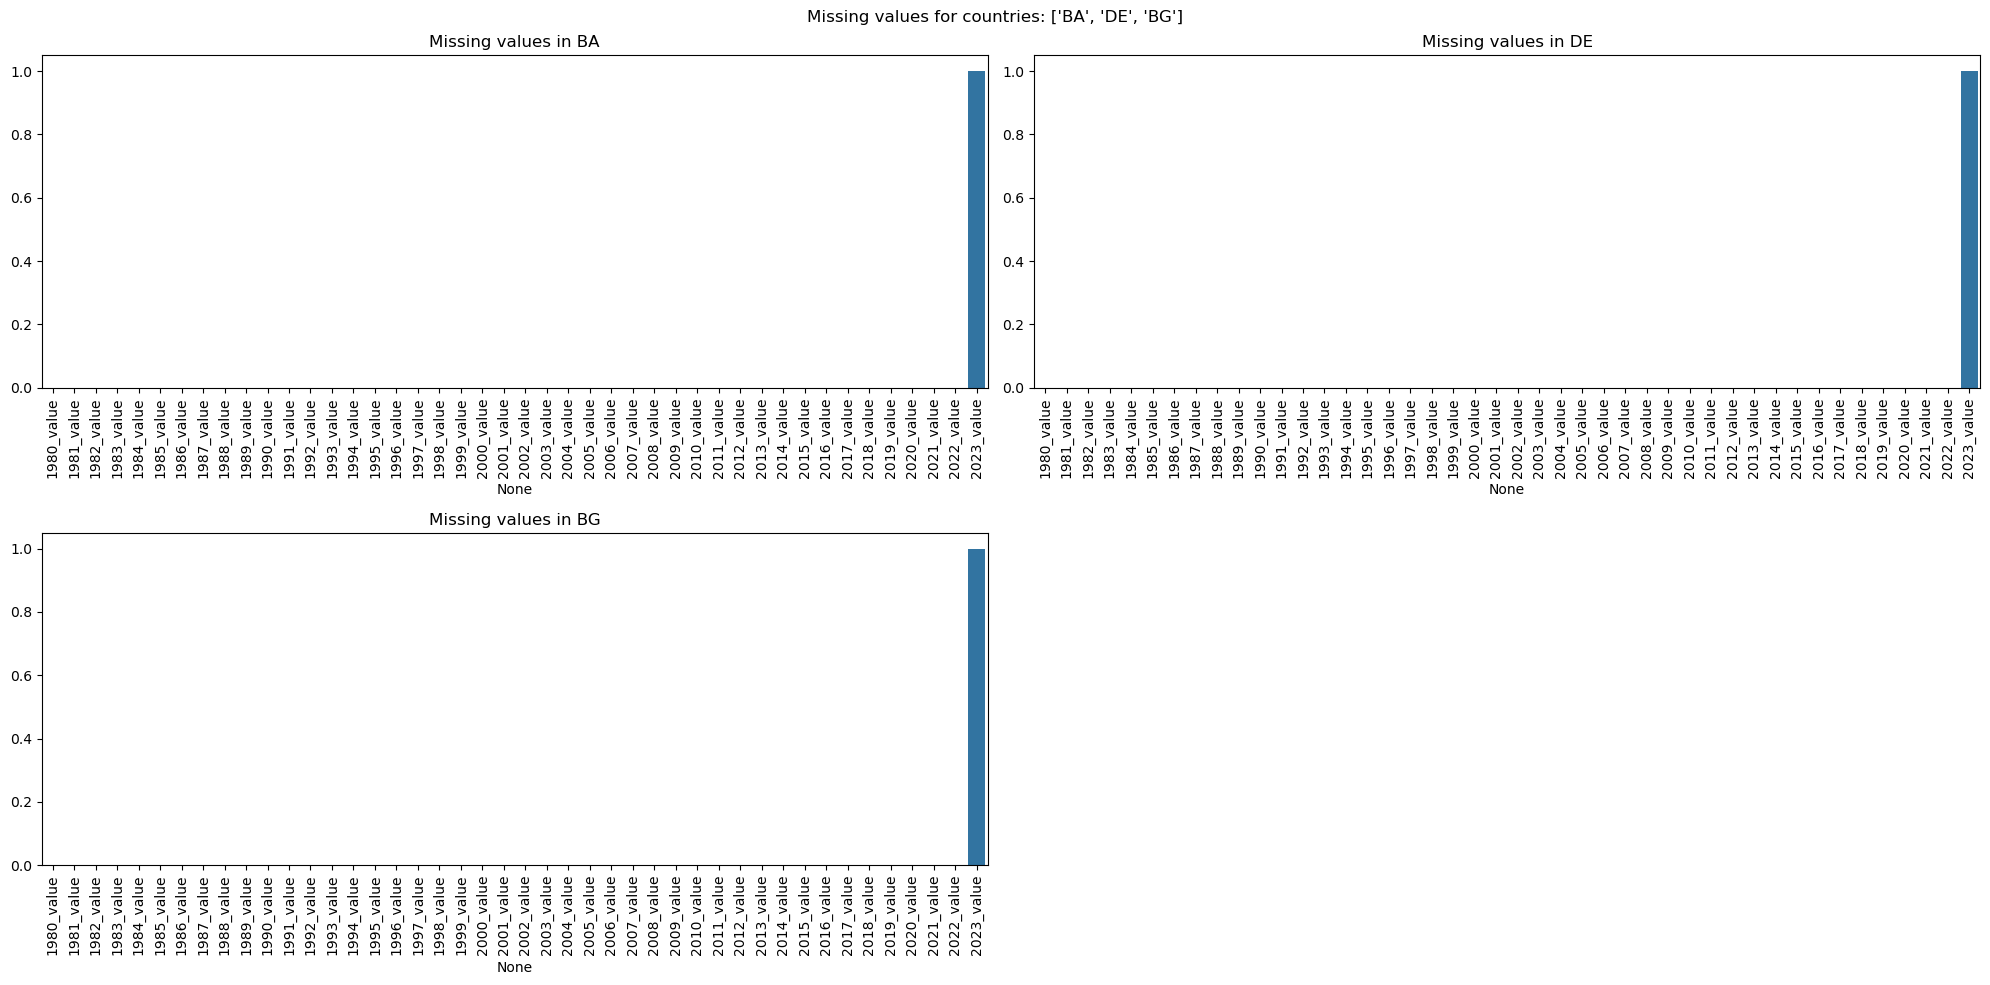

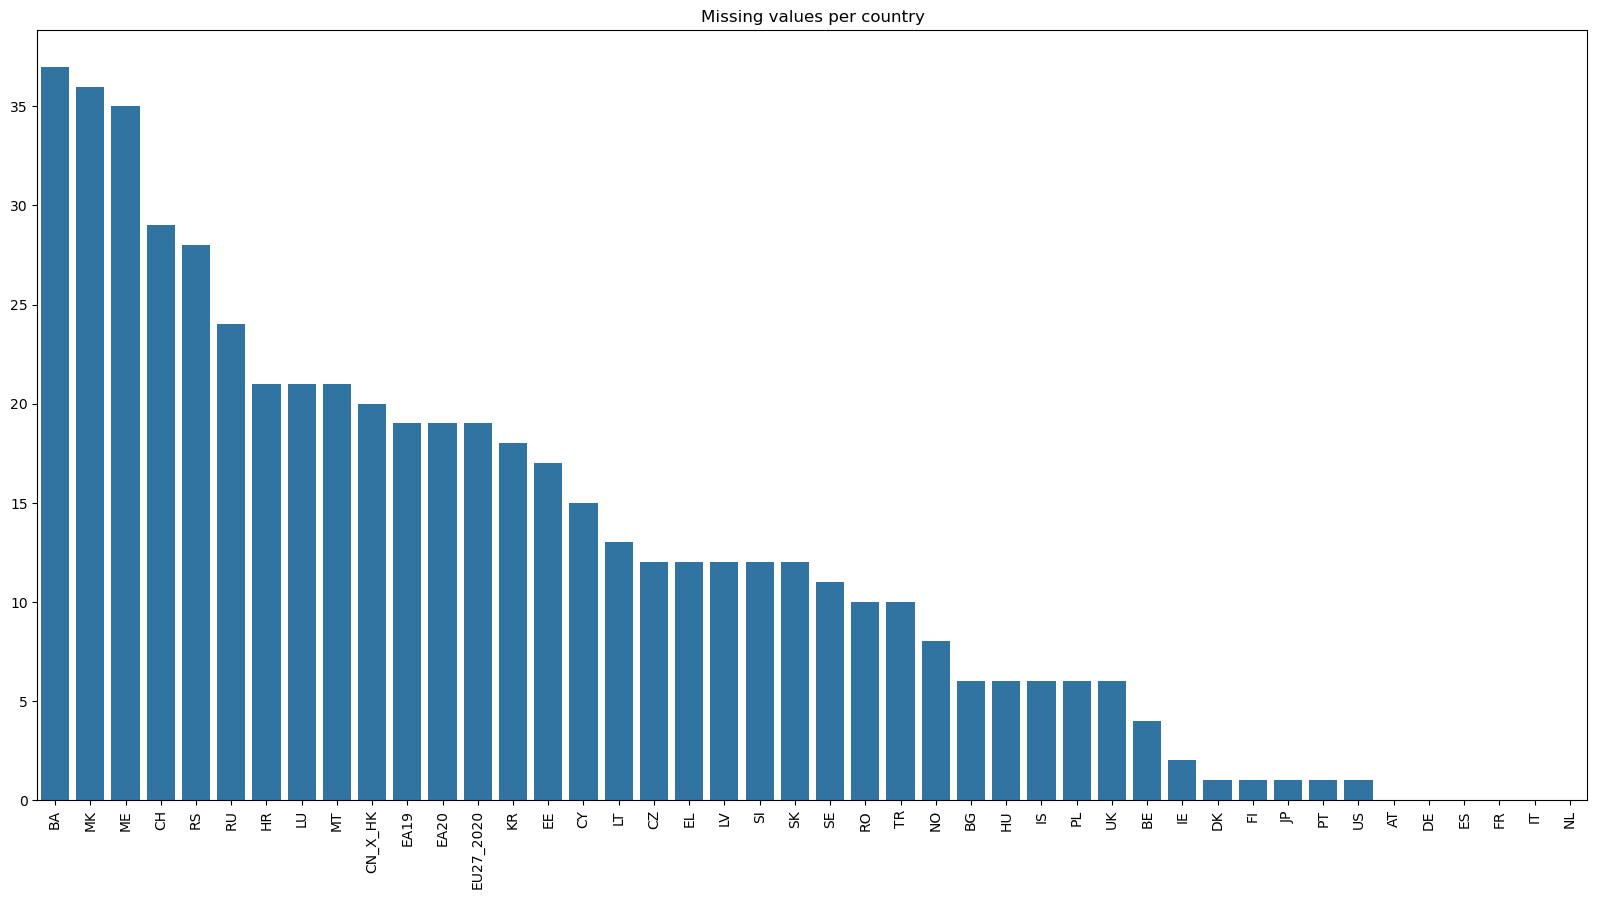

In [26]:
time_span = 43  # max timespan =43 current year - time_span
sector = "TOTAL"  # All sectors
unit = "EUR_HAB"  # Euro per inhabitant
# access the data this can be accessed like [-2*time_span:] but the first 4 columns should also be kepped since they have valueable information
import seaborn as sns
import matplotlib.pyplot as plt
import math

dataBySector = RD_EXP_BY_SECTOR[
    (RD_EXP_BY_SECTOR["sectperf"] == sector) & (RD_EXP_BY_SECTOR["unit"] == unit)
]
missingData = {}
# check for missing values per country


def getMissingDataForTimespan(dataBySector, time_span, plotCountries=[]):
    missingData = {}

    for country in countries:
        country_data = dataBySector[dataBySector["geo\TIME_PERIOD"] == country]
        missing_values = country_data.isnull().sum()
        missing_values = missing_values[
            missing_values.index.str.contains(r"\d{4}_value")
        ]
        missingData[country] = sum(missing_values[-time_span:])

    if len(plotCountries) == 0:
        return missingData

    # Plot for the specified countries
    num_cols = 2
    num_rows = math.ceil(len(plotCountries) / num_cols)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(20, 5 * num_rows))
    axs = axs.flatten()
    fig.suptitle(f"Missing values for countries: {plotCountries}")
    for idx, country in enumerate(plotCountries):
        ax = axs[idx]
        sns.barplot(x=missing_values.index, y=missing_values.values, ax=ax)
        ax.set_xticklabels(missing_values.index, rotation=90)
        ax.set_title(f"Missing values in {country}")
    # Hide any unused subplots
    for ax in axs[len(plotCountries) :]:
        ax.set_visible(False)
    plt.tight_layout()
    plt.show()

    return missingData


missingData = getMissingDataForTimespan(dataBySector, time_span, ["BA", "DE", "BG"])
# plot the distribution of missing values per country
# sort the values by the number of missing values
missingData = dict(sorted(missingData.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(20, 10))
sns.barplot(x=missingData.keys(), y=missingData.values())
plt.xticks(rotation=90)
plt.title("Missing values per country")
plt.show()

Find the timespan where got the most data to support the analysis.


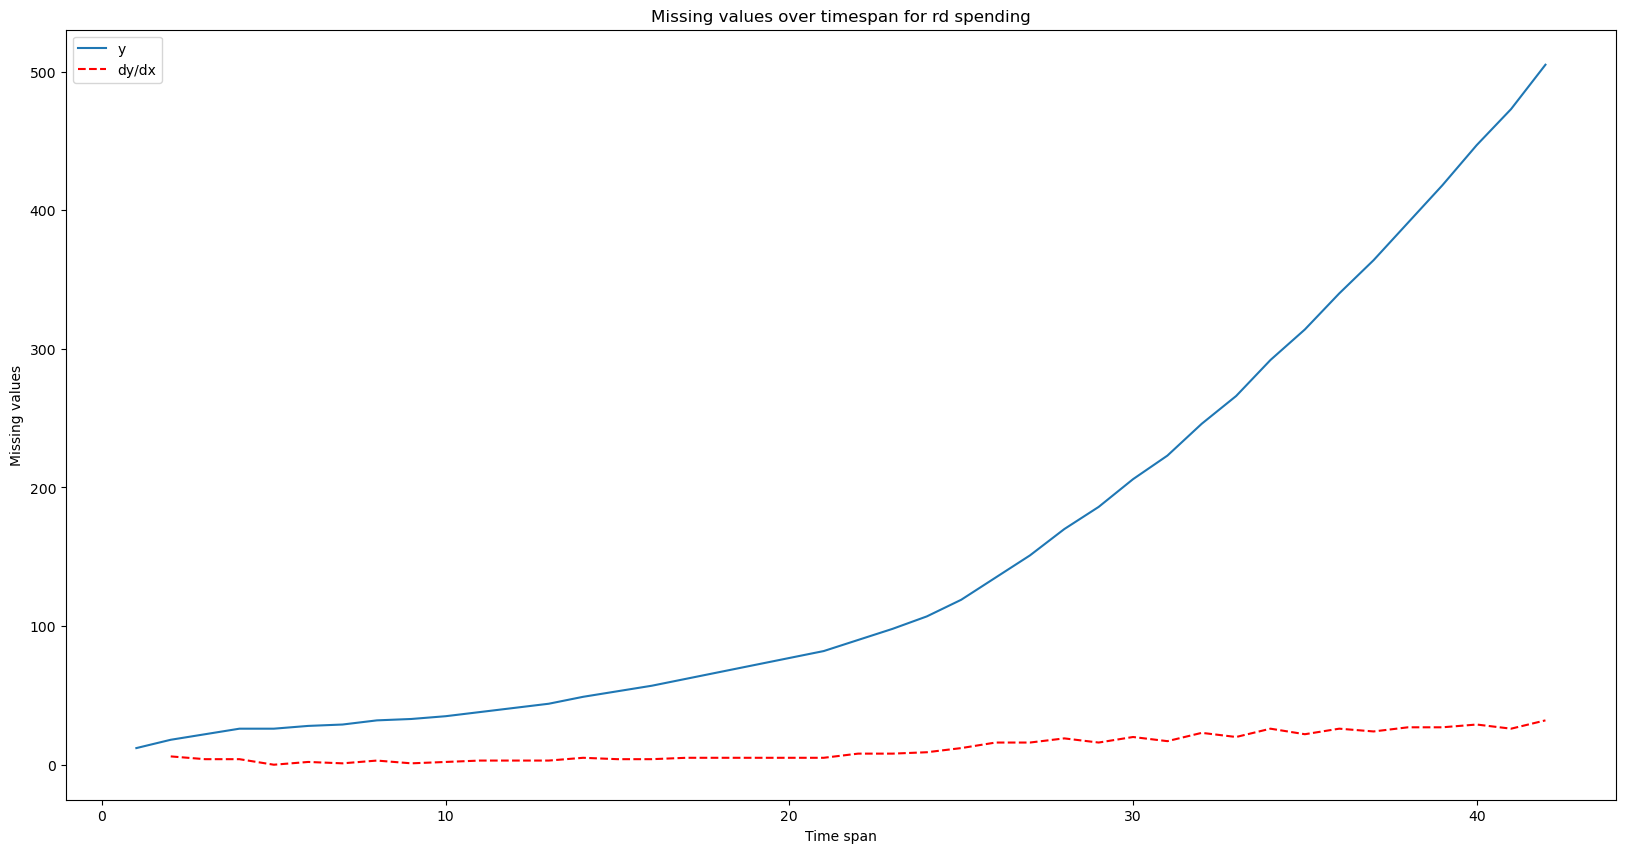

   x   y  y_total  rel_missing_values  dy/dx
0  1  12       44            0.272727    NaN
1  2  18       88            0.204545    6.0
2  3  22      132            0.166667    4.0
3  4  26      176            0.147727    4.0
4  5  26      220            0.118182    0.0


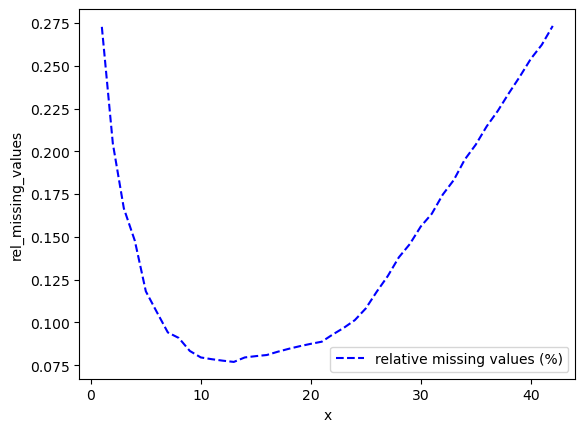

In [27]:
import pandas as pd



plotData = pd.DataFrame()


# add columns x and y


plotData["x"] = range(1, 43)


plotData["y"] = [
    sum(getMissingDataForTimespan(dataBySector, time_span, []).values())
    for time_span in range(1, 43)
]


# plotData["total_y"] = [sum(dataBySector.)]


plotData["y_total"] = [
    time_span * len(RD_EXP_BY_SECTOR["geo\TIME_PERIOD"].unique())
    for time_span in range(1, 43)
]


plotData["rel_missing_values"] = plotData["y"] / plotData["y_total"]



# Calculate the derivative (numerical approximation)


plotData["dy/dx"] = plotData["y"].diff()



# Plotting the data and its derivative


plt.figure(figsize=(20, 10))



# Plot the original data


sns.lineplot(data=plotData, x="x", y="y", label="y")



# Plot the derivative


sns.lineplot(
    data=plotData, x="x", y="dy/dx", label="dy/dx", linestyle="--", color="red"
)



plt.xlabel("Time span")


plt.ylabel("Missing values")


plt.title("Missing values over timespan for rd spending")
plt.legend()


plt.show()



print(plotData.head())


sns.lineplot(
    data=plotData,
    x="x",
    y="rel_missing_values",
    label="relative missing values (%)",
    linestyle="--",
    color="blue",
)


plt.show()

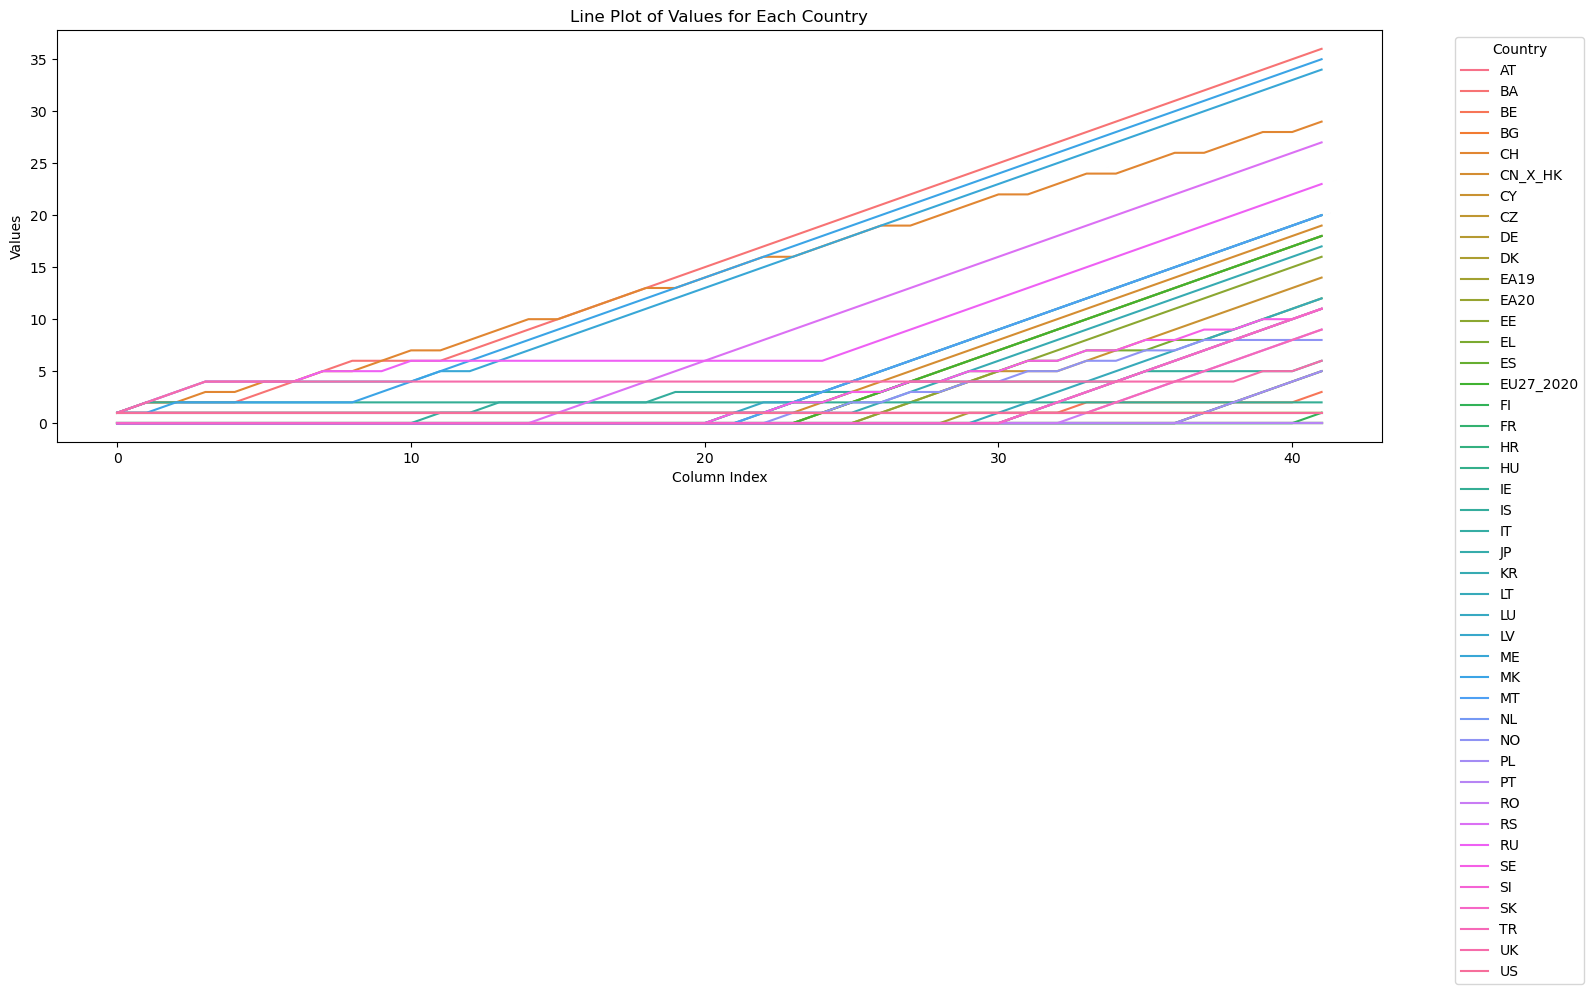

In [28]:
# print(dataBySector.head())

missingValuesPerCountryAndTimeSpan = pd.DataFrame(
    getMissingDataForTimespan(dataBySector, time_span) for time_span in range(1, 43)
)
missingValuesPerCountryAndTimeSpan = missingValuesPerCountryAndTimeSpan.T
# print(missingValuesPerCountryAndTimeSpan)

missingValuesPerCountryAndTimeSpan.reset_index(inplace=True)
missingValuesPerCountryAndTimeSpan.rename(columns={"index": "Country"}, inplace=True)


data_melted = missingValuesPerCountryAndTimeSpan.melt(
    id_vars="Country", var_name="Column", value_name="Value"
)

plt.figure(figsize=(16, 8))
sns.lineplot(data=data_melted, x="Column", y="Value", hue="Country")

# Customize plot
plt.title("Line Plot of Values for Each Country")
plt.xlabel("Column Index")
plt.ylabel("Values")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# Decisions so far

Based on the analysis so far, a suitable range for continuing would be a timespan of somewhere between 20 and 25 years. This is the timespan, where the share of missing values is quite small, but the timeframe itself is not to little.


# Analysis Patent Applications


    freq    unit geo\TIME_PERIOD  1978_value 1978_flag  1979_value 1979_flag  \
285    A  P_MHAB              AT         NaN         :       35.12             
286    A  P_MHAB              AU         NaN         :       11.52             
287    A  P_MHAB              BE         NaN         :       25.18             
288    A  P_MHAB              BG         NaN         :         NaN         :   
289    A  P_MHAB              BR         NaN         :        0.12             
290    A  P_MHAB              CA         NaN         :        5.94             
291    A  P_MHAB              CH         NaN         :      141.22             
292    A  P_MHAB              CY         NaN         :         NaN         :   
293    A  P_MHAB              CZ         NaN         :         NaN         :   
294    A  P_MHAB              DE         NaN         :       81.31             
295    A  P_MHAB              DK         NaN         :       21.54             
296    A  P_MHAB            EA18        

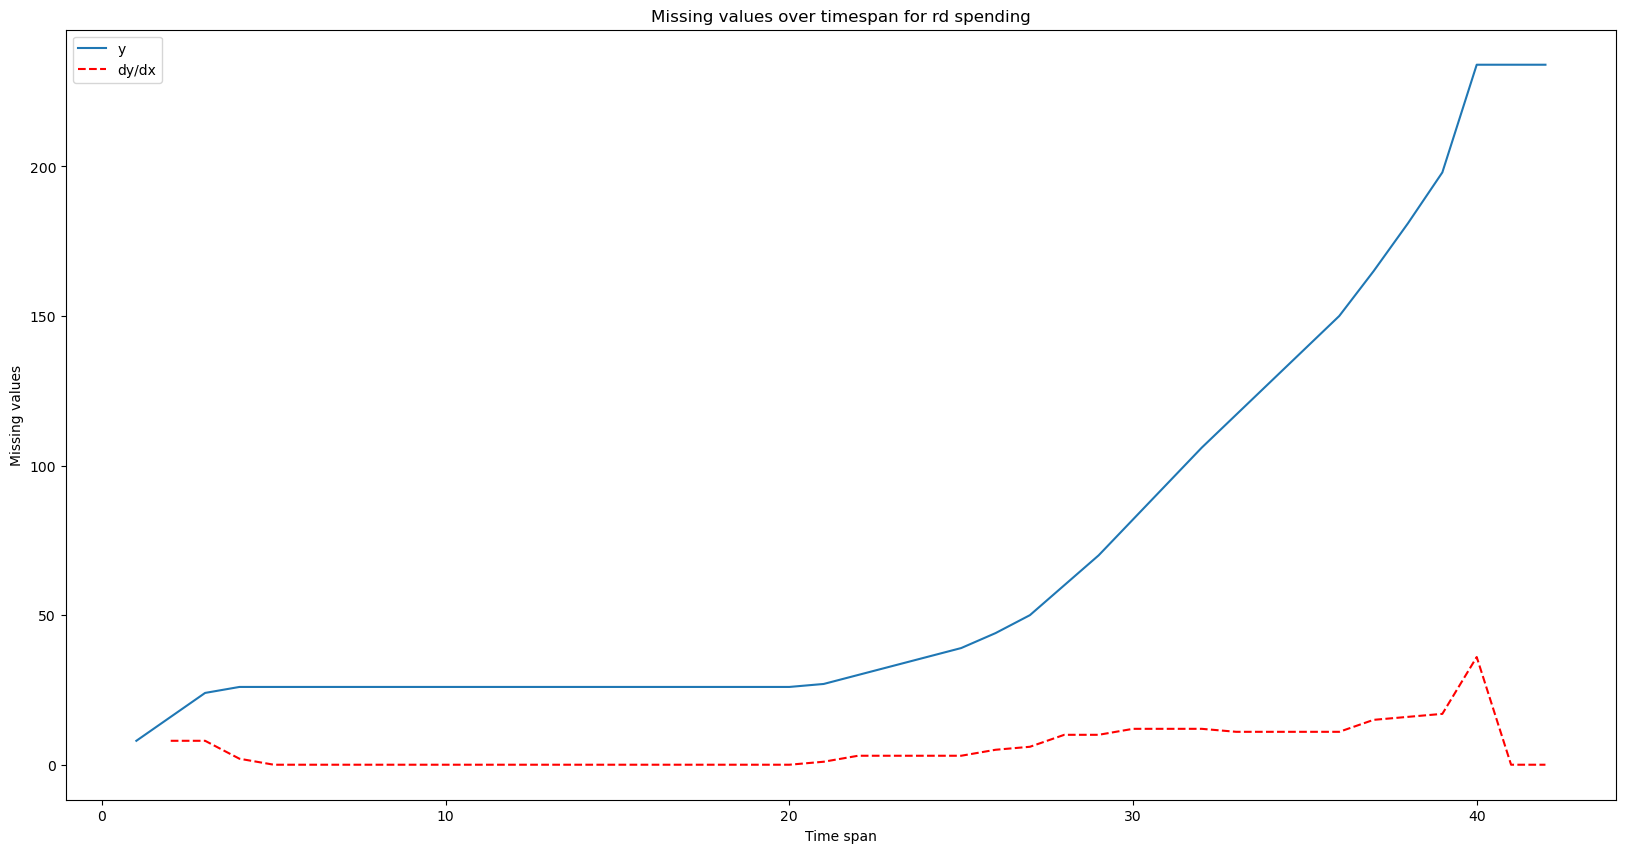

   x     y  y_total  rel_missing_values  dy/dx
0  1   8.0       48            0.166667    NaN
1  2  16.0       96            0.166667    8.0
2  3  24.0      144            0.166667    8.0
3  4  26.0      192            0.135417    2.0
4  5  26.0      240            0.108333    0.0


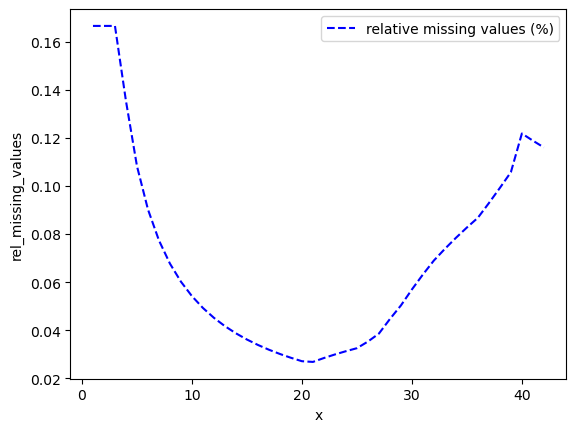

In [29]:
# print(PAT_APPLICATIONS_HIST.head())
unit = "P_MHAB"
sector = "Total"
filteredPatentApplications = PAT_APPLICATIONS_HIST[
    (PAT_APPLICATIONS_HIST["unit"] == unit)
]

print(filteredPatentApplications)


plotData = pd.DataFrame()
# add columns x and y
plotData["x"] = range(1, 43)
plotData["y"] = [
    sum(getMissingDataForTimespan(filteredPatentApplications, time_span).values())
    for time_span in range(1, 43)
]
# plotData["total_y"] = [sum(dataBySector.)]
plotData["y_total"] = [
    time_span * len(filteredPatentApplications["geo\TIME_PERIOD"].unique())
    for time_span in range(1, 43)
]
plotData["rel_missing_values"] = plotData["y"] / plotData["y_total"]


# Calculate the derivative (numerical approximation)
plotData["dy/dx"] = plotData["y"].diff()

# Plotting the data and its derivative
plt.figure(figsize=(20, 10))

# Plot the original data
sns.lineplot(data=plotData, x="x", y="y", label="y")

# Plot the derivative
sns.lineplot(
    data=plotData, x="x", y="dy/dx", label="dy/dx", linestyle="--", color="red"
)


plt.xlabel("Time span")
plt.ylabel("Missing values")
plt.title("Missing values over timespan for rd spending")
plt.legend()
plt.show()

print(plotData.head())
sns.lineplot(
    data=plotData,
    x="x",
    y="rel_missing_values",
    label="relative missing values (%)",
    linestyle="--",
    color="blue",
)
plt.show()

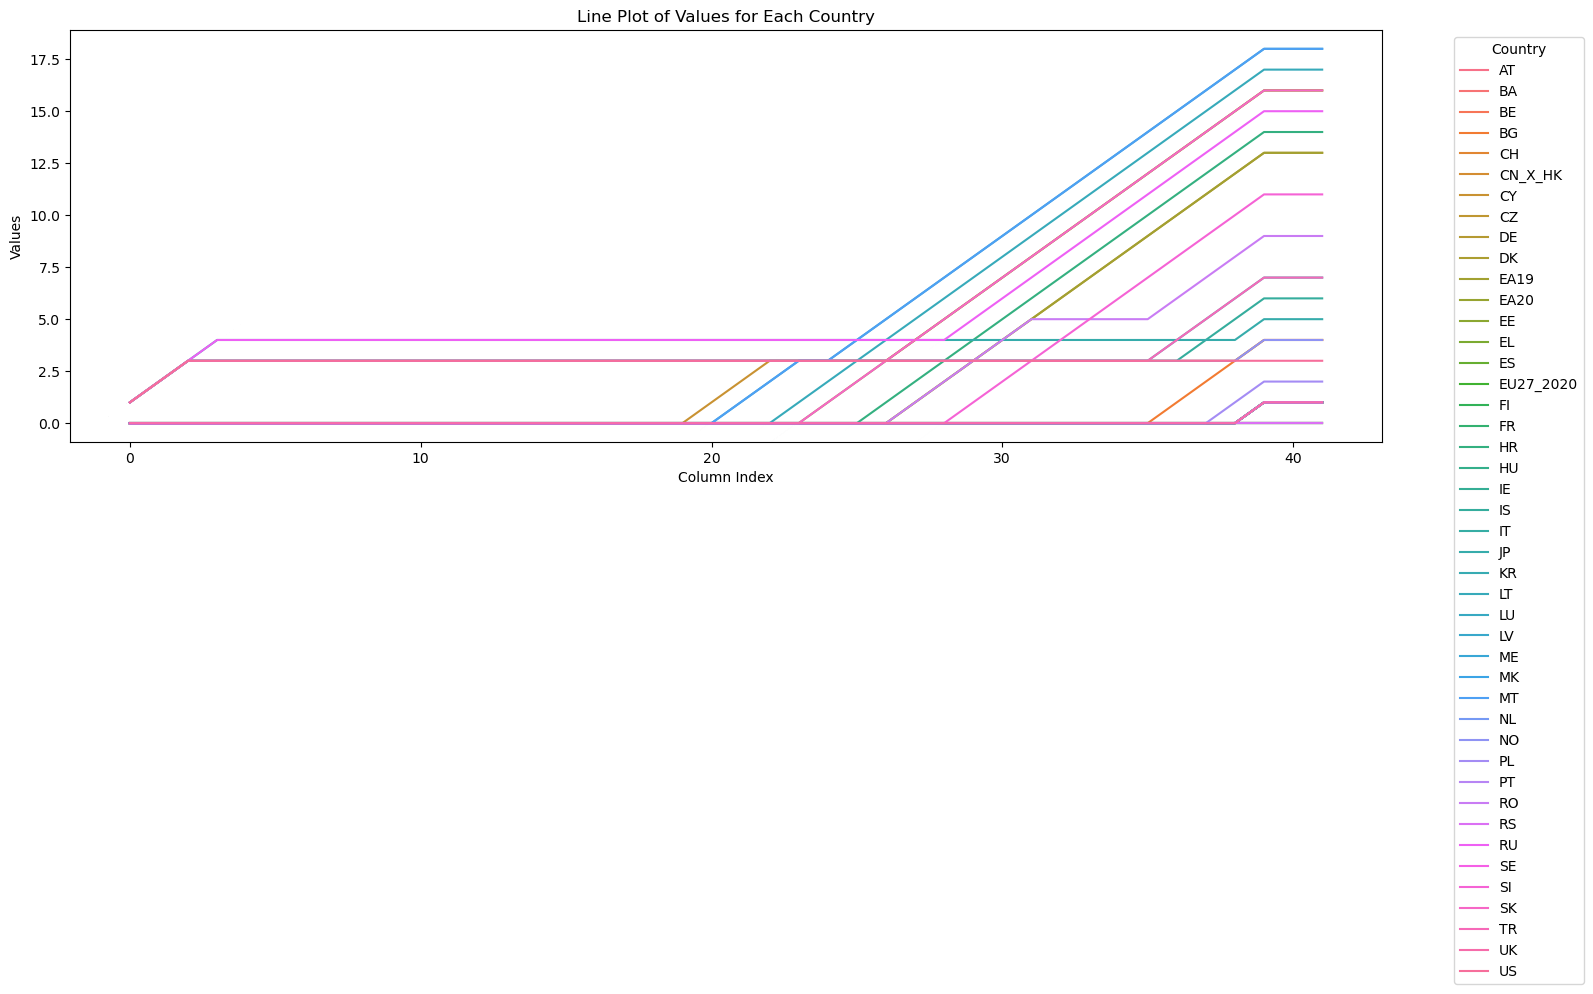

In [30]:
# print(dataBySector.head())

missingValuesPerCountryAndTimeSpan = pd.DataFrame(
    getMissingDataForTimespan(filteredPatentApplications, time_span, [])
    for time_span in range(1, 43)
)
missingValuesPerCountryAndTimeSpan = missingValuesPerCountryAndTimeSpan.T
# print(missingValuesPerCountryAndTimeSpan)

missingValuesPerCountryAndTimeSpan.reset_index(inplace=True)
missingValuesPerCountryAndTimeSpan.rename(columns={"index": "Country"}, inplace=True)


data_melted = missingValuesPerCountryAndTimeSpan.melt(
    id_vars="Country", var_name="Column", value_name="Value"
)

plt.figure(figsize=(16, 8))
sns.lineplot(data=data_melted, x="Column", y="Value", hue="Country")

# Customize plot
plt.title("Line Plot of Values for Each Country")
plt.xlabel("Column Index")
plt.ylabel("Values")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

## Decisions on Patent Applications

Also here the most optimal range of values seems to be somewhat between 20 and 25 years in the past.


# Data Preprocessing

Now, after we did some upfront analysis, we will continue with preparing a suitable dataset for further analysis.

## R&D spending

Let's start with the R&D spending.


In [31]:
sector = "TOTAL"
unit1 = "EUR_HAB"
unit2 = "PC_GDP"
year = 2024 - 25

# Filter Sector and units
RD_filtered = RD_EXP_BY_SECTOR[
    (RD_EXP_BY_SECTOR["sectperf"] == sector)
    & ((RD_EXP_BY_SECTOR["unit"] == unit1) | (RD_EXP_BY_SECTOR["unit"] == unit2))
]

# Drop unnecessary columns and rename columns
RD_filtered.drop(columns=["freq", "sectperf"], inplace=True)
RD_filtered.rename(columns={"geo\TIME_PERIOD": "Country", "unit": "Unit"}, inplace=True)

# Change to long format for further preprocessing
RD_long = RD_filtered.melt(
    id_vars=["Country", "Unit"], var_name="Year_Indicator", value_name="Value"
)

# Split year and indicator
RD_long[["Year", "Indicator"]] = RD_long["Year_Indicator"].str.split("_", expand=True)
RD_long.drop(columns=["Year_Indicator"], inplace=True)
RD_long["Year"] = pd.to_numeric(RD_long["Year"])

# Filter to relevant time range
RD_long = RD_long[RD_long["Year"] >= year]


# Rename the different units
RD_long["Unit"].replace(
    {"EUR_HAB": "RD_spend_Euro_per_Inhabitant", "PC_GDP": "RD_spend_Percent_of_GDP"},
    inplace=True,
)

# RD_long.reset_index(drop=True, inplace=True)


# Separate value and flag in two columns
RD_long = RD_long.pivot_table(
    index=["Country", "Year", "Unit"],
    values="Value",
    columns="Indicator",
    aggfunc="first",
)

# Rename to capital letters
RD_long.rename(columns={"value": "Value", "flag": "Flag"}, inplace=True)

# Convert value to numeric value for imputation
RD_long["Value"] = pd.to_numeric(RD_long["Value"])

# Reset index created by pivot
RD_long.reset_index(inplace=True)

# Remove Indicator title for columns
RD_long.columns.name = None

# RD_long.set_index(['Country', 'Year', 'Unit'], inplace=True)
display(RD_long)

/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/956209663.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RD_filtered.drop(columns=["freq", "sectperf"], inplace=True)
/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/956209663.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RD_filtered.rename(columns={"geo\TIME_PERIOD": "Country", "unit": "Unit"}, inplace=True)


,Country,Year,Unit,Flag,Value
0,AT,1999,RD_spend_Euro_per_Inhabitant,e,471.258
1,AT,1999,RD_spend_Percent_of_GDP,e,1.850
2,AT,2000,RD_spend_Euro_per_Inhabitant,e,503.446
3,AT,2000,RD_spend_Percent_of_GDP,e,1.900
4,AT,2001,RD_spend_Euro_per_Inhabitant,e,547.702
...,...,...,...,...,...
2195,US,2021,RD_spend_Percent_of_GDP,bd,3.480
2196,US,2022,RD_spend_Euro_per_Inhabitant,dp,2628.471
2197,US,2022,RD_spend_Percent_of_GDP,dp,3.590
2198,US,2023,RD_spend_Euro_per_Inhabitant,:,NaN


In [32]:
def plotFlatStruc(df, x, y, hue):
    plt.plot(df[x], df[y], marker="o", linestyle="-", color="b")
    plt.xticks(df[x], rotation=45)
    plt.show()

## Imputation of missing values using interpolation


,Country,Year,Unit,Flag,Value


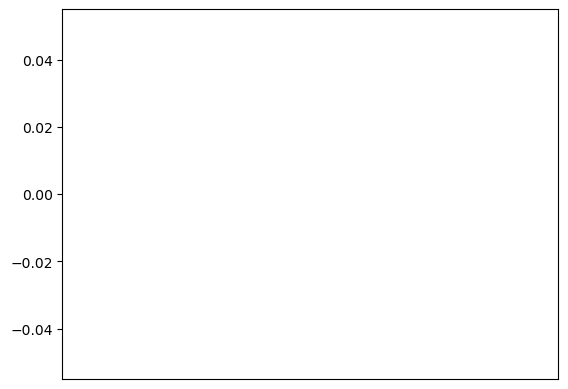

,Country,Year,Unit,Flag,Value


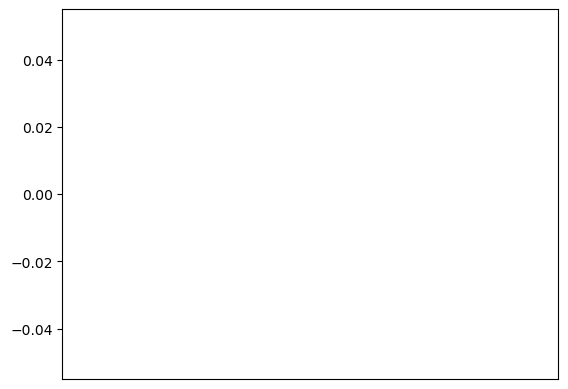

In [33]:
# Impute NaNs

country_to_test = "IS"
unit_to_test = "Percent_of_GDP"
# display(RD_long)

display(
    RD_long[(RD_long["Unit"] == unit_to_test) & (RD_long["Country"] == country_to_test)]
)

plotFlatStruc(
    RD_long[
        (RD_long["Unit"] == unit_to_test) & (RD_long["Country"] == country_to_test)
    ],
    x="Year",
    y="Value",
    hue="Country",
)

RD_long["Value"] = RD_long.groupby(by=["Country", "Unit"])["Value"].transform(
    lambda group: group.interpolate(method="index")
)

display(
    RD_long[(RD_long["Unit"] == unit_to_test) & (RD_long["Country"] == country_to_test)]
)

plotFlatStruc(
    RD_long[
        (RD_long["Unit"] == unit_to_test) & (RD_long["Country"] == country_to_test)
    ],
    x="Year",
    y="Value",
    hue="Country",
)

In [34]:
display(RD_long)

,Country,Year,Unit,Flag,Value
0,AT,1999,RD_spend_Euro_per_Inhabitant,e,471.258
1,AT,1999,RD_spend_Percent_of_GDP,e,1.850
2,AT,2000,RD_spend_Euro_per_Inhabitant,e,503.446
3,AT,2000,RD_spend_Percent_of_GDP,e,1.900
4,AT,2001,RD_spend_Euro_per_Inhabitant,e,547.702
...,...,...,...,...,...
2195,US,2021,RD_spend_Percent_of_GDP,bd,3.480
2196,US,2022,RD_spend_Euro_per_Inhabitant,dp,2628.471
2197,US,2022,RD_spend_Percent_of_GDP,dp,3.590
2198,US,2023,RD_spend_Euro_per_Inhabitant,:,2628.471


# Preprocessing Patent Applications


## Historical Data (1999-2004)


In [35]:
unit1 = "P_MHAB"
# unit2 = "PC_GDP"
year = 2024 - 25

# Filter Sector and units
PAT_hist_filtered = PAT_APPLICATIONS_HIST[(PAT_APPLICATIONS_HIST["unit"] == unit1)]

# Drop unnecessary columns and rename columns
PAT_hist_filtered.drop(columns=["freq"], inplace=True)

PAT_hist_filtered.rename(
    columns={"geo\TIME_PERIOD": "Country", "unit": "Unit"}, inplace=True
)

# #Change to long format for further preprocessing
PAT_hist_long = PAT_hist_filtered.melt(
    id_vars=["Country", "Unit"], var_name="Year_Indicator", value_name="Value"
)

# Split year and indicator
PAT_hist_long[["Year", "Indicator"]] = PAT_hist_long["Year_Indicator"].str.split(
    "_", expand=True
)

PAT_hist_long.drop(columns=["Year_Indicator"], inplace=True)
PAT_hist_long["Year"] = pd.to_numeric(PAT_hist_long["Year"])

# Filter to relevant time range
PAT_hist_long = PAT_hist_long[
    (PAT_hist_long["Year"] >= year) & (PAT_hist_long["Year"] <= 2003)
]

# Rename the different units
PAT_hist_long["Unit"].replace(
    {"P_MHAB": "Pat_appl_per_million_inhabitants"}, inplace=True
)


display(PAT_hist_long)

/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/2740712059.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAT_hist_filtered.drop(columns=["freq"], inplace=True)
/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/2740712059.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAT_hist_filtered.rename(


,Country,Unit,Value,Year,Indicator
2016,AT,Pat_appl_per_million_inhabitants,134.33,1999,value
2017,AU,Pat_appl_per_million_inhabitants,51.5,1999,value
2018,BE,Pat_appl_per_million_inhabitants,131.63,1999,value
2019,BG,Pat_appl_per_million_inhabitants,0.97,1999,value
2020,BR,Pat_appl_per_million_inhabitants,0.74,1999,value
...,...,...,...,...,...
2491,SK,Pat_appl_per_million_inhabitants,,2003,flag
2492,TR,Pat_appl_per_million_inhabitants,,2003,flag
2493,UK,Pat_appl_per_million_inhabitants,,2003,flag
2494,US,Pat_appl_per_million_inhabitants,,2003,flag


## New Data (2004 - 2023)


In [36]:
unit1 = "P_MHAB"
coop = "APPL"

# Filter Sector and units
PAT_new_filtered = PAT_APPLICATIONS_NEW[
    (PAT_APPLICATIONS_NEW["unit"] == unit1) & (PAT_APPLICATIONS_NEW["coop_ptn"] == coop)
]

# Drop unnecessary columns and rename columns
PAT_new_filtered.drop(columns=["freq", "coop_ptn"], inplace=True)

PAT_new_filtered.rename(
    columns={"geo\TIME_PERIOD": "Country", "unit": "Unit"}, inplace=True
)

# #Change to long format for further preprocessing
PAT_new_long = PAT_new_filtered.melt(
    id_vars=["Country", "Unit"], var_name="Year_Indicator", value_name="Value"
)

# Split year and indicator
PAT_new_long[["Year", "Indicator"]] = PAT_new_long["Year_Indicator"].str.split(
    "_", expand=True
)

PAT_new_long.drop(columns=["Year_Indicator"], inplace=True)


PAT_new_long["Year"] = pd.to_numeric(PAT_new_long["Year"])

# Filter to relevant time range
PAT_new_long = PAT_new_long[(PAT_new_long["Year"] >= 2004)]

# Rename the different units
PAT_new_long["Unit"].replace(
    {"P_MHAB": "Pat_appl_per_million_inhabitants"}, inplace=True
)

display(PAT_new_long)

/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/913015078.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAT_new_filtered.drop(columns=["freq", "coop_ptn"], inplace=True)
/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/913015078.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PAT_new_filtered.rename(


,Country,Unit,Value,Year,Indicator
0,AL,Pat_appl_per_million_inhabitants,NaN,2004,value
1,AT,Pat_appl_per_million_inhabitants,122.37,2004,value
2,BA,Pat_appl_per_million_inhabitants,NaN,2004,value
3,BE,Pat_appl_per_million_inhabitants,143.27,2004,value
4,BG,Pat_appl_per_million_inhabitants,2.07,2004,value
...,...,...,...,...,...
1515,RS,Pat_appl_per_million_inhabitants,bp,2023,flag
1516,SE,Pat_appl_per_million_inhabitants,p,2023,flag
1517,SI,Pat_appl_per_million_inhabitants,p,2023,flag
1518,SK,Pat_appl_per_million_inhabitants,p,2023,flag


## Combinining Historical and Current


In [37]:
PAT_comb_long = pd.concat([PAT_hist_long, PAT_new_long], axis=0)
PAT_comb_long.reset_index(drop=True, inplace=True)


# Separate value and flag in two columns
PAT_comb_long = PAT_comb_long.pivot_table(
    index=["Country", "Year", "Unit"],
    values="Value",
    columns="Indicator",
    aggfunc="first",
)


# Rename to capital letters
PAT_comb_long.rename(columns={"value": "Value", "flag": "Flag"}, inplace=True)

# Convert value to numeric value for imputation
PAT_comb_long["Value"] = pd.to_numeric(PAT_comb_long["Value"])

# Reset index created by pivot
PAT_comb_long.reset_index(inplace=True)

# Remove Indicator title for columns
PAT_comb_long.columns.name = None

PAT_new_long["Year"] = pd.to_numeric(PAT_new_long["Year"])


# RD_long.set_index(['Country', 'Year', 'Unit'], inplace=True)

display(PAT_comb_long)

,Country,Year,Unit,Flag,Value
0,AL,2004,Pat_appl_per_million_inhabitants,:,NaN
1,AL,2005,Pat_appl_per_million_inhabitants,:,NaN
2,AL,2006,Pat_appl_per_million_inhabitants,:,NaN
3,AL,2007,Pat_appl_per_million_inhabitants,:,NaN
4,AL,2008,Pat_appl_per_million_inhabitants,:,NaN
...,...,...,...,...,...
995,ZA,1999,Pat_appl_per_million_inhabitants,,3.15
996,ZA,2000,Pat_appl_per_million_inhabitants,,3.28
997,ZA,2001,Pat_appl_per_million_inhabitants,,2.66
998,ZA,2002,Pat_appl_per_million_inhabitants,,2.86


## Imputation of missing Values


,Country,Year,Unit,Flag,Value
50,BA,2004,Pat_appl_per_million_inhabitants,:,NaN
51,BA,2005,Pat_appl_per_million_inhabitants,:,NaN
52,BA,2006,Pat_appl_per_million_inhabitants,:,NaN
53,BA,2007,Pat_appl_per_million_inhabitants,:,NaN
54,BA,2008,Pat_appl_per_million_inhabitants,:,NaN
55,BA,2009,Pat_appl_per_million_inhabitants,,0.26
56,BA,2010,Pat_appl_per_million_inhabitants,,0.52
57,BA,2011,Pat_appl_per_million_inhabitants,,0.00
58,BA,2012,Pat_appl_per_million_inhabitants,,0.78
59,BA,2013,Pat_appl_per_million_inhabitants,,0.26


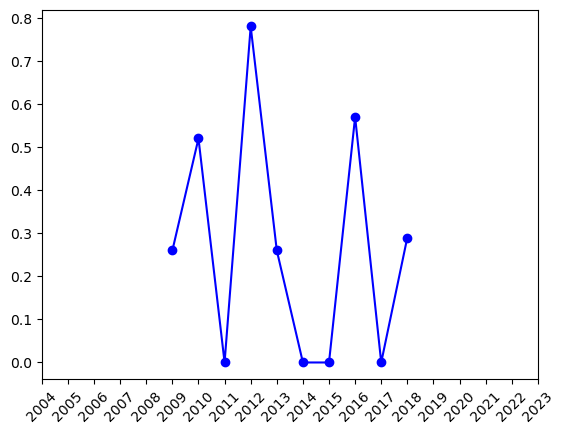

,Country,Year,Unit,Flag,Value
50,BA,2004,Pat_appl_per_million_inhabitants,:,NaN
51,BA,2005,Pat_appl_per_million_inhabitants,:,NaN
52,BA,2006,Pat_appl_per_million_inhabitants,:,NaN
53,BA,2007,Pat_appl_per_million_inhabitants,:,NaN
54,BA,2008,Pat_appl_per_million_inhabitants,:,NaN
55,BA,2009,Pat_appl_per_million_inhabitants,,0.26
56,BA,2010,Pat_appl_per_million_inhabitants,,0.52
57,BA,2011,Pat_appl_per_million_inhabitants,,0.00
58,BA,2012,Pat_appl_per_million_inhabitants,,0.78
59,BA,2013,Pat_appl_per_million_inhabitants,,0.26


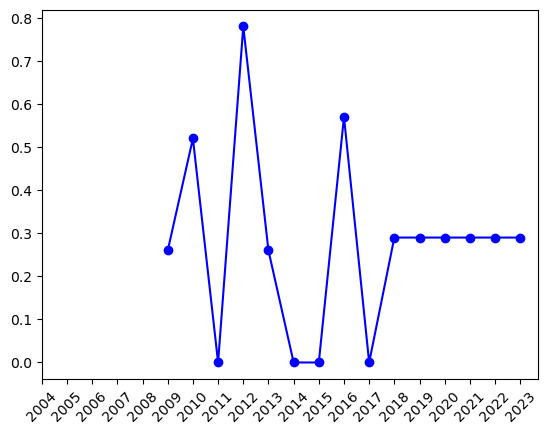

In [38]:
# Impute NaNs

country_to_test = "BA"
unit_to_test = "Pat_appl_per_million_inhabitants"

display(
    PAT_comb_long[
        (PAT_comb_long["Unit"] == unit_to_test)
        & (PAT_comb_long["Country"] == country_to_test)
    ]
)

plotFlatStruc(
    PAT_comb_long[
        (PAT_comb_long["Unit"] == unit_to_test)
        & (PAT_comb_long["Country"] == country_to_test)
    ],
    x="Year",
    y="Value",
    hue="Country",
)

PAT_comb_long["Value"] = PAT_comb_long.groupby(by=["Country", "Unit"])[
    "Value"
].transform(lambda group: group.interpolate(method="index"))

display(
    PAT_comb_long[
        (PAT_comb_long["Unit"] == unit_to_test)
        & (PAT_comb_long["Country"] == country_to_test)
    ]
)

plotFlatStruc(
    PAT_comb_long[
        (PAT_comb_long["Unit"] == unit_to_test)
        & (PAT_comb_long["Country"] == country_to_test)
    ],
    x="Year",
    y="Value",
    hue="Country",
)

# Merge Dataset


In [39]:
merged_df = pd.concat([RD_long, PAT_comb_long], axis=0)
merged_df.reset_index(drop=True, inplace=True)
merged_df.sort_values(by=["Country", "Year", "Unit"], inplace=True)

merged_df.set_index(["Country", "Year", "Unit"], inplace=True)
display(merged_df)

Flag  Value
Country Year Unit                                        
AL      2004 Pat_appl_per_million_inhabitants    :    NaN
        2005 Pat_appl_per_million_inhabitants    :    NaN
        2006 Pat_appl_per_million_inhabitants    :    NaN
        2007 Pat_appl_per_million_inhabitants    :    NaN
        2008 Pat_appl_per_million_inhabitants    :    NaN
...                                            ...    ...
ZA      1999 Pat_appl_per_million_inhabitants        3.15
        2000 Pat_appl_per_million_inhabitants        3.28
        2001 Pat_appl_per_million_inhabitants        2.66
        2002 Pat_appl_per_million_inhabitants        2.86
        2003 Pat_appl_per_million_inhabitants        3.19

[3200 rows x 2 columns]

Looks like for a time span sub 20-30 years, the data has not too many missing values. Also the number of missing values starts to increase after a time span of ca 23 years.


Do the same for the patent dataset, and see if the same pattern is observed.


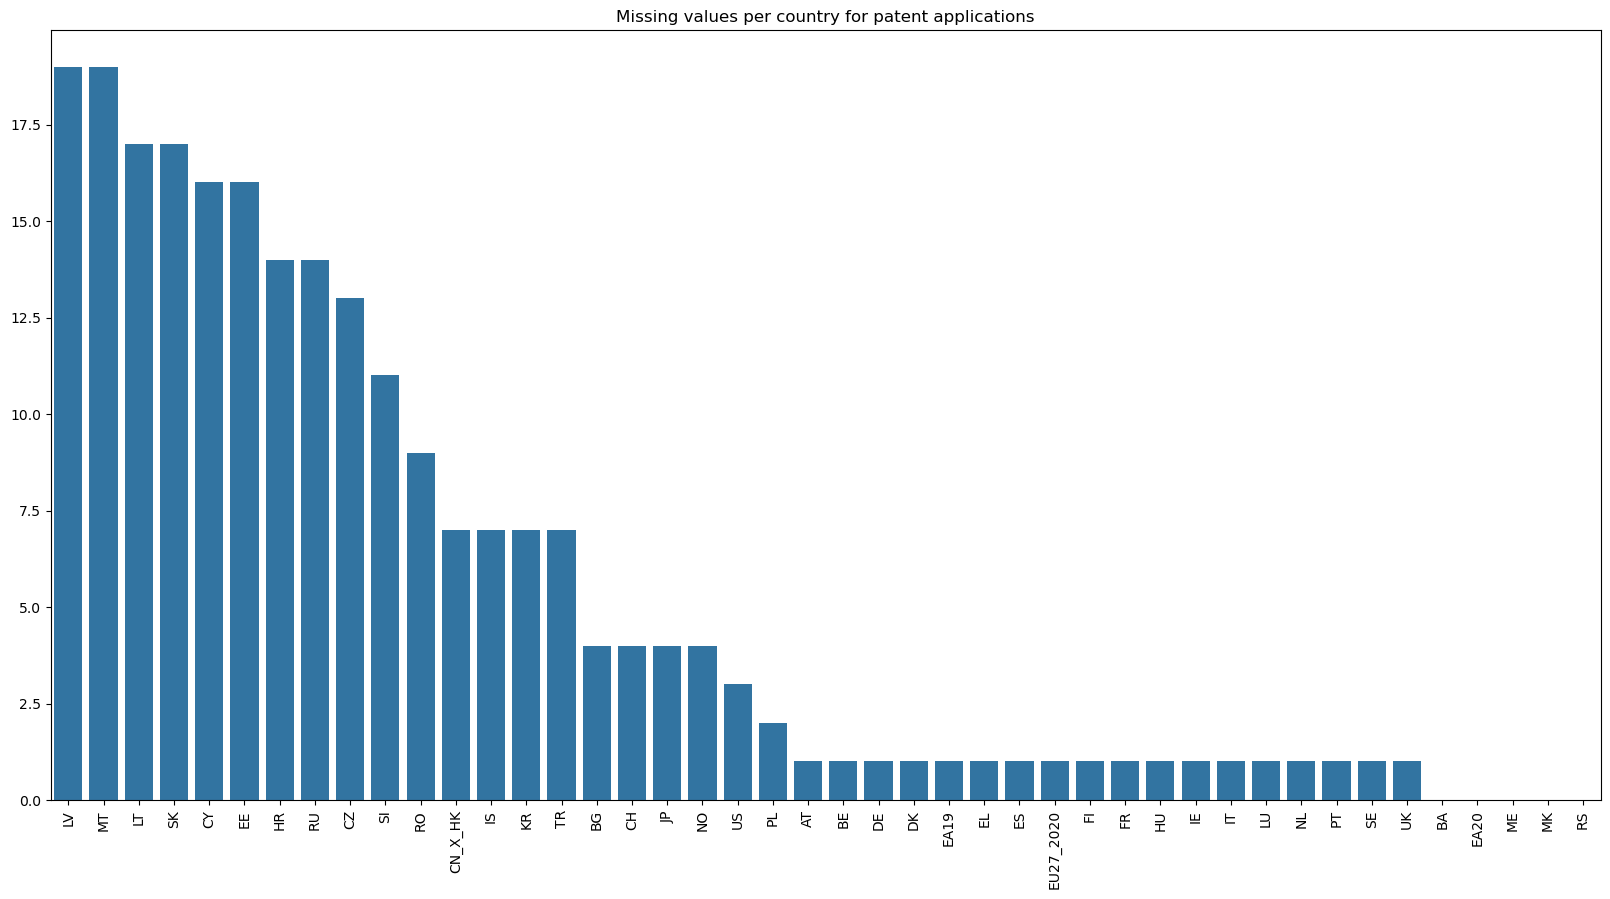

In [40]:
time_span = 43
unit = "NR"  # should be enough since we already cleaned the rnd spending data according to inhabitants
data = PAT_APPLICATIONS_HIST[(PAT_APPLICATIONS_HIST["unit"] == unit)]

missingData = getMissingDataForTimespan(data, time_span, [])

missingData = dict(sorted(missingData.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(20, 10))
sns.barplot(x=missingData.keys(), y=missingData.values())
plt.xticks(rotation=90)
plt.title("Missing values per country for patent applications")
plt.show()

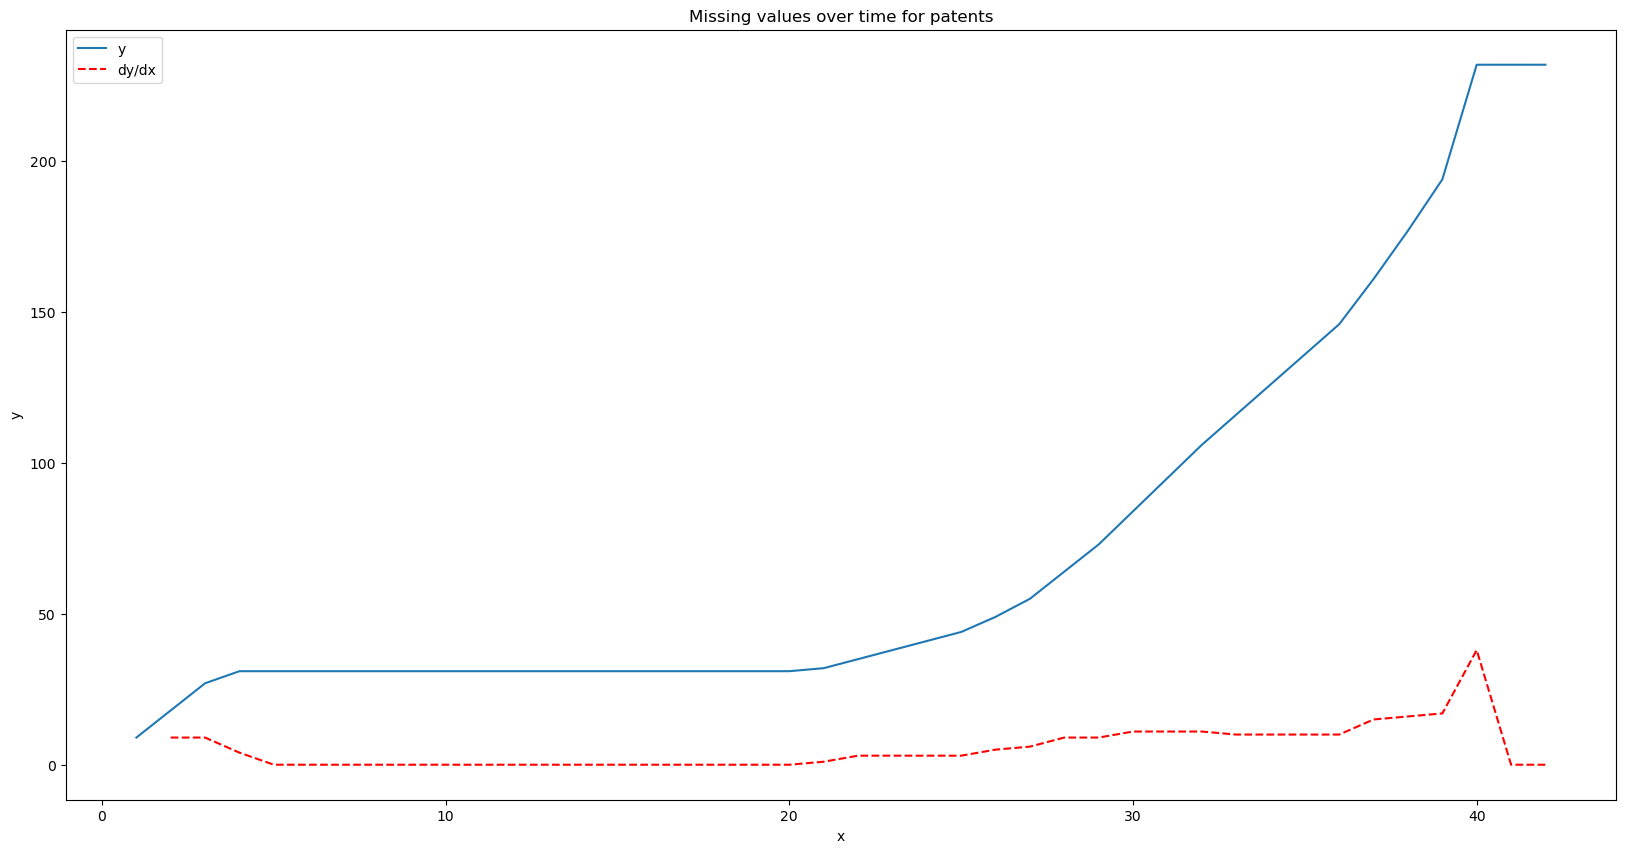

In [41]:
import pandas as pd



plotData = pd.DataFrame()


# add columns x and y


plotData["x"] = range(1, 43)


plotData["y"] = [
    sum(getMissingDataForTimespan(data, time_span, []).values())
    for time_span in range(1, 43)
]



# Calculate the derivative (numerical approximation)


plotData["dy/dx"] = plotData["y"].diff()



# Plotting the data and its derivative


plt.figure(figsize=(20, 10))



# Plot the original data


sns.lineplot(data=plotData, x="x", y="y", label="y")



# Plot the derivative


sns.lineplot(
    data=plotData, x="x", y="dy/dx", label="dy/dx", linestyle="--", color="red"
)


plt.title("Missing values over time for patents")
plt.legend()


plt.show()

Looks like the patent dataset as good data for the last 20-25 years.


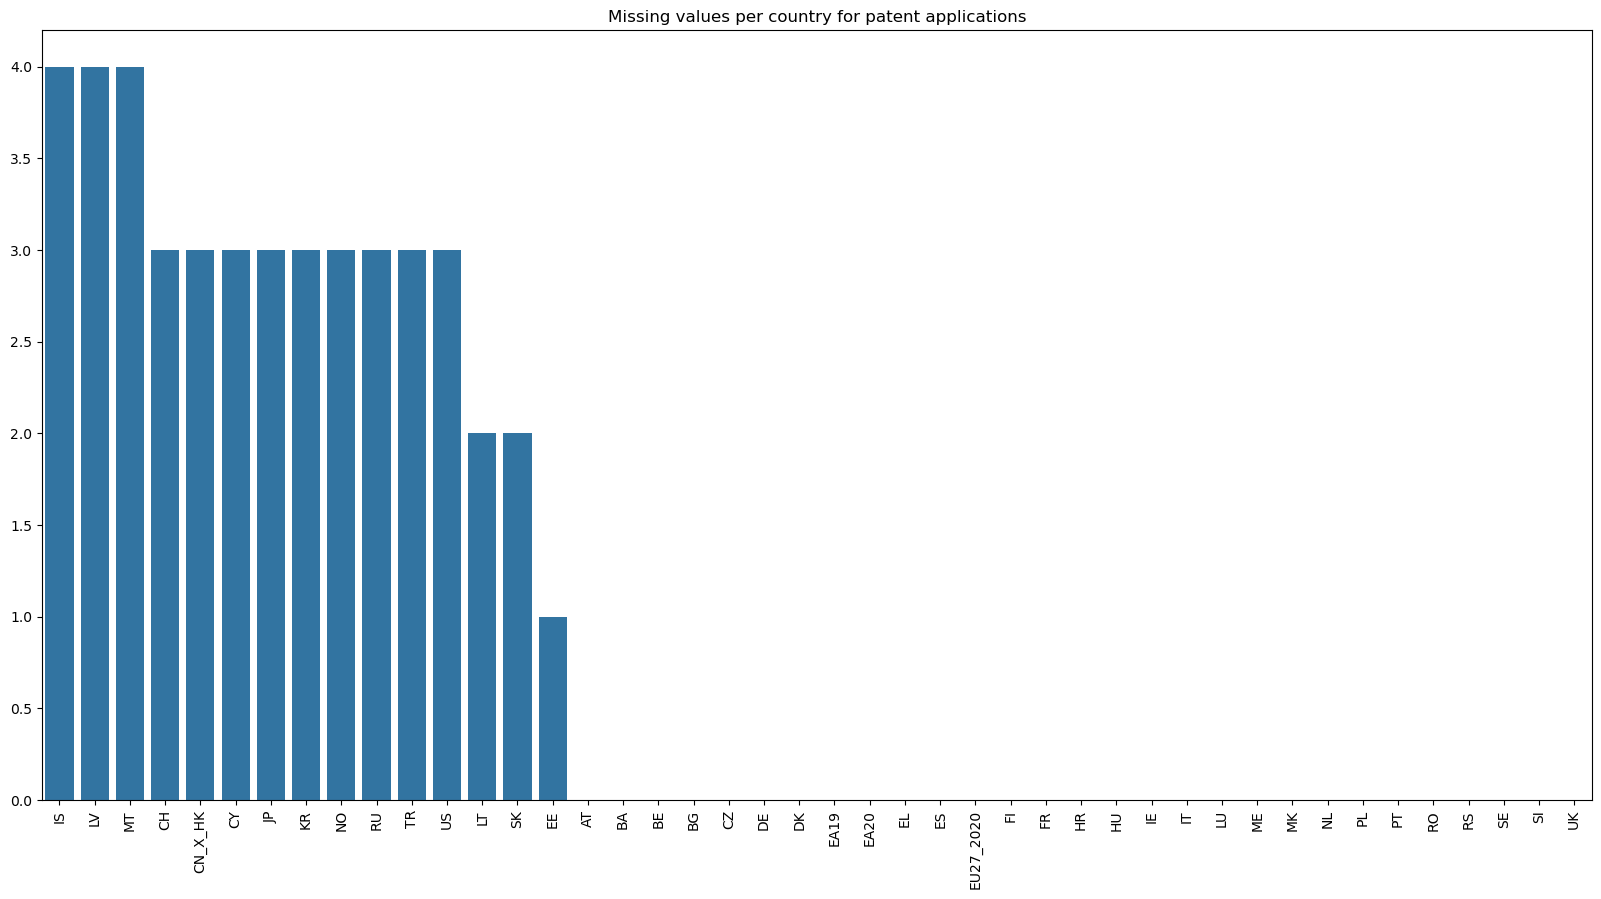

In [42]:
time_span = 25
unit = "NR"  # should be enough since we already cleaned the rnd spending data according to inhabitants
data = PAT_APPLICATIONS_HIST[(PAT_APPLICATIONS_HIST["unit"] == unit)]

missingData = getMissingDataForTimespan(data, time_span, [])

missingData = dict(sorted(missingData.items(), key=lambda item: item[1], reverse=True))
plt.figure(figsize=(20, 10))
sns.barplot(x=missingData.keys(), y=missingData.values())
plt.xticks(rotation=90)
plt.title("Missing values per country for patent applications")
plt.show()

# Combination of both to check Correlation

In [80]:
country_abbreviations = {
    'Albania': 'AL', 'Austria': 'AT', 'Belarus': 'BY', 'Belgium': 'BE', 
    'Bosnia and Herzegovina': 'BA', 'Bulgaria': 'BG', 'Croatia': 'HR', 
    'Czech Republic': 'CZ', 'Denmark': 'DK', 'Estonia': 'EE', 
    'Finland': 'FI', 'France': 'FR', 'Germany': 'DE', 'Greece': 'EL', 
    'Hungary': 'HU', 'Iceland': 'IS', 'Ireland': 'IE', 'Italy': 'IT', 
    'Latvia': 'LV', 'Lithuania': 'LT', 'Luxembourg': 'LU', 'Malta': 'MT', 
    'Montenegro': 'ME', 'Netherlands': 'NL', 'North Macedonia': 'MK', 
    'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 
    'Republic of Moldova': 'MD', 'Romania': 'RO', 'Russian Federation': 'RU', 
    'Serbia': 'RS', 'Slovakia': 'SK', 'Slovenia': 'SI', 'Spain': 'ES', 
    'Sweden': 'SE', 'Switzerland': 'CH', 'Ukraine': 'UA', 
    'United Kingdom': 'UK'
}
GII_2023_prepared['Country'] = GII_2023_prepared.index.map(country_abbreviations)

#display(GII_2023_prepared)

#merged_df.reset_index(inplace=True)
merged_df_relevant = merged_df[(merged_df["Year"] == 2023) & (merged_df["Unit"] == "RD_spend_Euro_per_Inhabitant")]
result = pd.merge(merged_df_relevant, GII_2023_prepared, on=["Country", "Country"], how='inner')

result = result[['Country', 'Year', 'Value', 'Final']]
result.rename(columns={"Value": "RD_spend_Euro_per_Inhabitant"}, inplace=True)
result.set_index(['Country', 'Year'], inplace=True)

display(result)
print(result.corr())

#TODO: vielleicht noch andere Jahre ansehen und verschönern (Code)

/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/105523646.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GII_2023_prepared['Country'] = GII_2023_prepared.index.map(country_abbreviations)


,,RD_spend_Euro_per_Inhabitant,Final
Country,Year,,
AT,2023,1711.235,53.247123
BA,2023,9.923,27.148722
BE,2023,1687.640,49.943794
BG,2023,116.371,38.983933
CH,2023,2622.067,67.588814
CZ,2023,537.506,44.833748
DE,2023,1540.704,58.755365
DK,2023,1894.514,58.733405
EE,2023,514.091,53.376560


                              RD_spend_Euro_per_Inhabitant     Final
RD_spend_Euro_per_Inhabitant                      1.000000  0.826126
Final                                             0.826126  1.000000


In [82]:
RD_spending = merged_df[(merged_df["Unit"] == "RD_spend_Euro_per_Inhabitant")]
RD_spending.drop(columns=["level_0", "index"], inplace=True)
display(RD_spending)

/var/folders/m9/jgt_wqqd6b5_pz2y028wb_ww0000gn/T/ipykernel_54584/3189240698.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  RD_spending.drop(columns=["level_0", "index"], inplace=True)


,Country,Year,Unit,Flag,Value
21,AT,1999,RD_spend_Euro_per_Inhabitant,e,471.258
24,AT,2000,RD_spend_Euro_per_Inhabitant,e,503.446
27,AT,2001,RD_spend_Euro_per_Inhabitant,e,547.702
30,AT,2002,RD_spend_Euro_per_Inhabitant,,580.918
33,AT,2003,RD_spend_Euro_per_Inhabitant,e,622.446
...,...,...,...,...,...
3185,US,2019,RD_spend_Euro_per_Inhabitant,d,1830.457
3187,US,2020,RD_spend_Euro_per_Inhabitant,d,1926.849
3189,US,2021,RD_spend_Euro_per_Inhabitant,bd,2090.641
3191,US,2022,RD_spend_Euro_per_Inhabitant,dp,2628.471


In [124]:
from statsmodels.tsa.arima.model import ARIMA

forecasts = []

for country, group in RD_spending.groupby('Country'):
    begyear = max(group['Year'])
    model = ARIMA(group['Value'], order=(5, 1, 0))
    model_fit = model.fit()
    pred = model_fit.forecast(steps=3)
    forecasts.append({'Country': country, 'Year': begyear+1, 'Unit': 'RD_spend_Euro_per_Inhabitant', 'Flag': 'predicted', 'Value': pred.iloc[0]})
    forecasts.append({'Country': country, 'Year': begyear+2, 'Unit': 'RD_spend_Euro_per_Inhabitant', 'Flag': 'predicted', 'Value': pred.iloc[1]})
    forecasts.append({'Country': country, 'Year': begyear+3, 'Unit': 'RD_spend_Euro_per_Inhabitant', 'Flag': 'predicted', 'Value': pred.iloc[2]})

RD_spending_temp = RD_spending
RD_spending_temp["Flag"] = "data"
RD_spending_forecast = pd.concat([RD_spending_temp, pd.DataFrame(forecasts)], ignore_index=True)
RD_spending_forecast.sort_values(by= ["Country", "Year"], inplace=True)
display(RD_spending_forecast)

/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index wil

,Country,Year,Unit,Flag,Value
0,AT,1999,RD_spend_Euro_per_Inhabitant,data,471.258000
1,AT,2000,RD_spend_Euro_per_Inhabitant,data,503.446000
2,AT,2001,RD_spend_Euro_per_Inhabitant,data,547.702000
3,AT,2002,RD_spend_Euro_per_Inhabitant,data,580.918000
4,AT,2003,RD_spend_Euro_per_Inhabitant,data,622.446000
...,...,...,...,...,...
1362,US,2028,RD_spend_Euro_per_Inhabitant,data,3407.635883
1363,US,2029,RD_spend_Euro_per_Inhabitant,data,3490.746392
1493,US,2030,RD_spend_Euro_per_Inhabitant,predicted,3641.621432
1494,US,2031,RD_spend_Euro_per_Inhabitant,predicted,3769.878636


/Users/tobiashuber/anaconda3/envs/DOPP/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


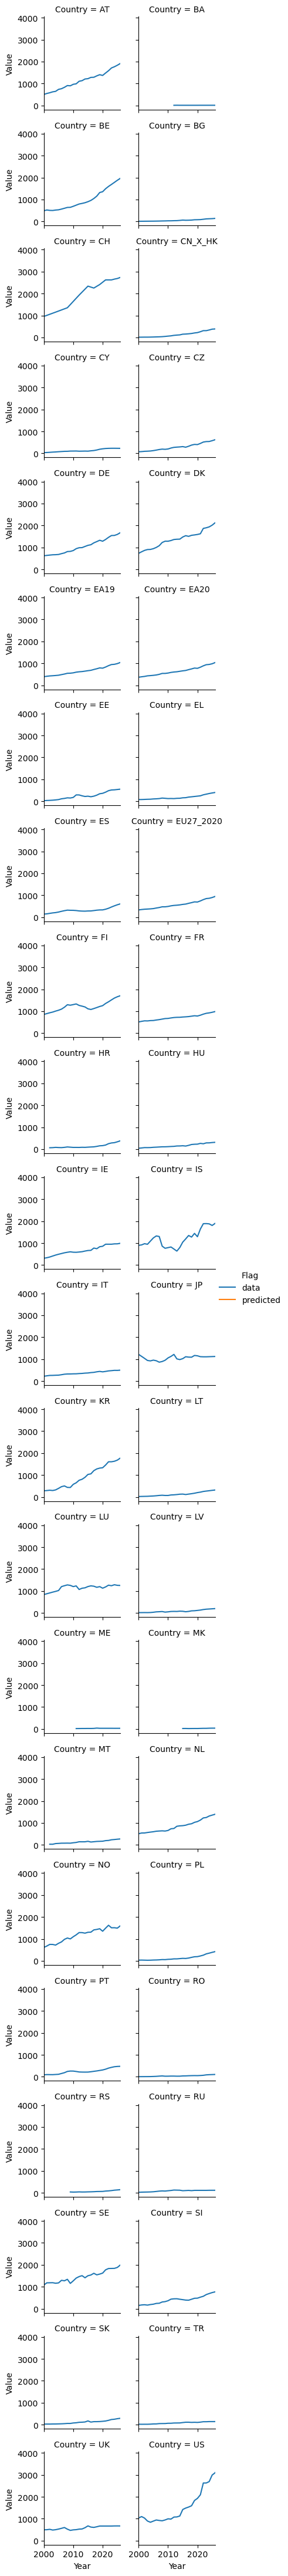

In [ ]:
g = sns.FacetGrid(RD_spending_forecast, col="Country", hue="Flag", col_wrap=2, height=2, xlim=(2000, 2026))
g.map(sns.lineplot, "Year", "Value")
g.add_legend()

//TODO: Farbliche Darstellung der PRediction? generell GRaphs aufbereiten.